# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Оценки параметров и сбор данных.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb и **в формате html**, который можно получить как `File -> Download as -> HTML`.
* Теоретические задачи необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив;
  * фотографией, **встроенной в ноутбук** посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Теоретические задачи не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта. Неправильно вставленные фотографии могут не передаться при отправке.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 3 балла
* Задача 2 &mdash; 5 баллов
* Задача 3 &mdash; 12 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 6 баллов
* Задача 5 &mdash; 10 баллов

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

import requests
from time import sleep
import json

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**Доказательство:**

Рассмотрим 
$$\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2 = \frac1n\sum\limits_{i=1}^n X_i^2 - \frac2n\sum\limits_{i=1}^n X_i \overline{X} + \overline{X}^2 = \overline{X^2} - \overline{X}\cdot 2 \cdot \frac1n\sum\limits_{i=1}^n X_i + \overline{X}^2 = \overline{X^2} - 2\overline{X}^2 + \overline{X}^2 = \overline{X^2}-\overline{X}^2.$$

**Что и требовалось доказать**.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$ рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

Воспользуемся подсказкой и посчитаем математическое ожидание $S^2$ обозначив $E(\overline{X}) = \mu$:

$$E\left(S^2\right) = E\left(\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2\right) = E\left(\frac1n\sum\limits_{i=1}^n\left(\left(X_i - \mu\right)-\left(\overline{X} - \mu\right)\right)^2\right) = E\left(\frac1n\sum\limits_{i=1}^n\left(X_i - \mu\right)^2 - 2\left(\overline{X} - \mu\right)\frac1n\sum\limits_{i=1}^n\left(X_i - \mu\right) + \left(\overline{X} - \mu\right)^2\right) = E\left(\frac1n\sum\limits_{i=1}^n\left(X_i-\mu\right)^2 - \left(\overline{X} - \mu\right)^2\right).$$

Раскрывая по линейности и учитывая, что:
$$E\left(\frac1n \sum\limits_{i=1}^{n}\left(X_i - \mu\right)^2\right) = \sigma^2,$$
$$E\left(\left(\overline{X} - \mu\right)^2\right) =E\left(\frac{1}{n^2} \sum\limits_{i=1}^{n}\left(X_i - \mu\right)^2 + \frac{2}{n^2} \sum\limits_{i=1, j=1, i<j}^{n}(X_i - \mu)(X_j - \mu)\right) = \frac1n \sigma^2.$$

Последние утверждение получено из независимости $X_i,\, X_j$, так как 
$$E\left(\sum\limits_{i=1, j=1, i<j}^{n}(X_i - \mu)(X_j - \mu)\right) = \sum\limits_{i=1, j=1, i<j}^{n}E\left(X_i - \mu\right)E\left(X_j - \mu\right) = 0,$$
так как $\forall i\ E(X_i - \mu) = 0$.

Получим:
$$E\left(S^2\right) = \frac{n-1}{n} \sigma^2.$$

**Статистика $S^2$ не является несмещенной оценкой $\sigma^2$.**

 ---
### Задача 2.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** Из прошлого пункта очевидно, что $\frac{n}{n-1}S^2$ является не смещенной. Статистика $S^2$ не является несмещенной оценкой $\sigma^2$.

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $U[0, 1]$. Далее вычислите среднее этих оценок, которое обозначим $\overline{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\overline{\theta}, y)$, где $y$ &mdash; произвольные различные (например 0, 1, 2) координаты для трёх различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение трёх типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите также презентацию с разбора задания 1. **Если график чему-то не удовлетворяет, оценка может быть снижена.**

Вместо использования `matplotlib` можно также строить графики с помощью `plotly`.

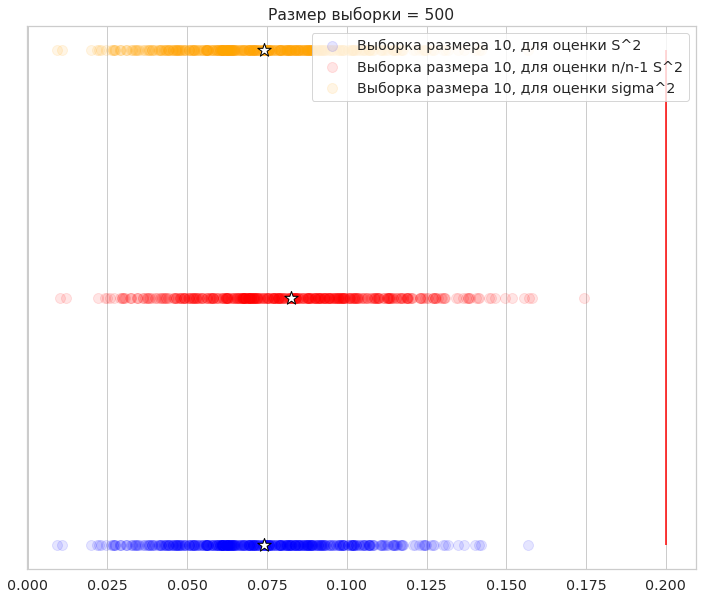

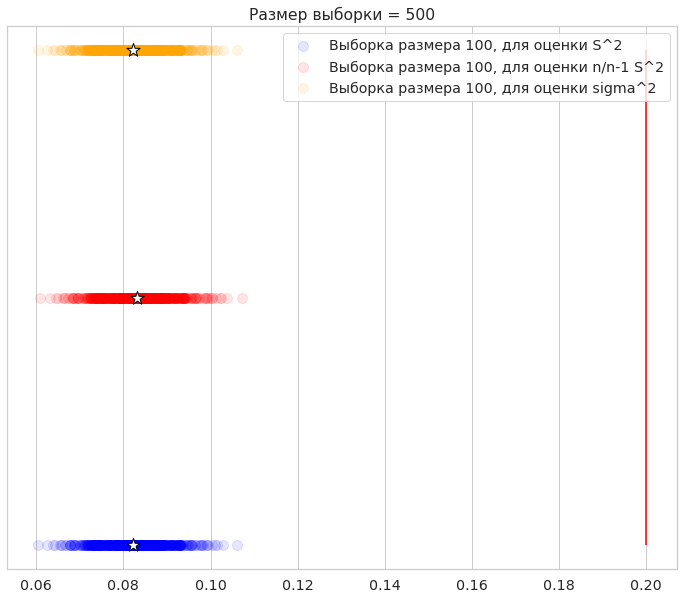

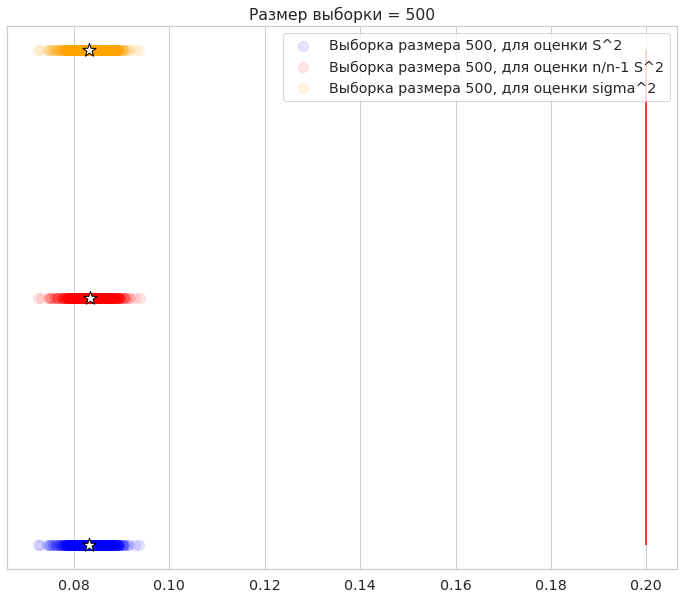

In [140]:
k = 500
for n in [10, 100, 500]:
    # Вначале:
    plt.figure(figsize=(12,10))

    x = sps.uniform.rvs(size=n*k)
    x = x.reshape(k, n)
    
    print_x = np.array([
        (x**2).mean(axis=1) - x.mean(axis=1)**2,
        ((x**2).mean(axis=1) - x.mean(axis=1)**2)*n/(n-1),
        x.var(axis=1)
    ])
    names = ["S^2","n/n-1 S^2", "sigma^2"] # попытка вставить латех не дала успешных результатов
    color = ['blue', 'red', 'orange']
        
    for y in [0, 1, 2]:
        # Для каждой оценки:
        plt.scatter(print_x[y], np.zeros(k) + y, 
                    alpha=0.1, s=100, color=color[y], label=f'Выборка размера {n}, для оценки '+ names[y])
        plt.scatter(print_x[y].mean(), y, marker='*', s=200, 
                    color='w', edgecolors='black')

    # Для всего графика:
    plt.vlines(0.2, 0, 2, color='r')
    plt.title(f'Размер выборки = {k}')
    plt.yticks([])
    plt.legend()

**Вывод:** При увеличении размера каждой выборки уменьшается разброс оценок дисперсии и уменьшается среднее значение оценок, то есть чем больше выборка, тем точнее мы получаем нашу оценку дисперсии. Теоритические догадки о смещенности $S^2$ и несмещенности $\frac{n}{n-1}S^2$ подтвердились.

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\overline{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://mipt-stats.gitlab.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. Какие из оценок являются асимптотически несмещёнными, т.е. $\forall \theta \in \Theta\colon \mathsf{E}_\theta \widehat{\theta} \to \theta$ при $n\to +\infty$?

**Решение:**

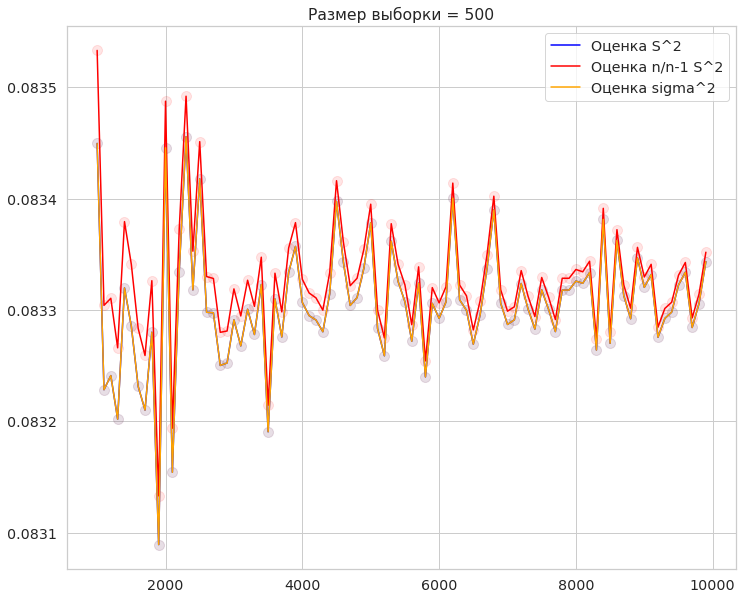

In [3]:
k = 500
n = np.arange(10**3, 10**4, 10**2)
# Вначале:
plt.figure(figsize=(12,10))
print_first = []
print_second = []
print_sigma = []
for i in n:
    x = sps.uniform.rvs(size=i*k)
    x = x.reshape(k, i)

    print_first += [((x**2).mean(axis=1) - x.mean(axis=1)**2).mean()]
    print_second += [(((x**2).mean(axis=1) - x.mean(axis=1)**2)*i/(i-1)).mean()]
    print_sigma += [x.var(axis=1).mean()]
    
    
print_first = np.array(print_first)
print_second = np.array(print_second)
print_sigma = np.array(print_sigma)
prints = [print_first, print_second, print_sigma]
names = ["S^2","n/n-1 S^2", "sigma^2"] # попытка вставить латех не дала успешных результатов
color = ['blue', 'red', 'orange']


for y in [0, 1, 2]:
    # Для каждой оценки:
    plt.scatter(n, prints[y], 
                alpha=0.1, s=100, color=color[y])
    plt.plot(n, prints[y], color=color[y], label='Оценка '+ names[y] )

    # Для всего графика:
    plt.title(f'Размер выборки = {k}')
    plt.legend()

**Вывод:** При достаточно больших $n$ есть асимптотическая несмещенность всех выборок ($S^2$ и $\frac{n}{n-1}S^2$). Так как расхождения при данных $n$ наблюдается в $10^{-5}$, и при этом графики сближаются при увеличении $n$.

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** 

Свойство несмещенности характеризует возможность получить оценку какой-либо величины с помощью другой оценки. В нашем случае несмещенный для дисперсии оценкой оказалась $\frac{n}{n-1}S^2$, а $S^2$ оказалась смещенный. Эти теоритические сведенья подтверждаются на практике (по построенным выборкам, 1 график). Однако, обе оценки асимптотически несмещенные.

Для эксперементов в физике используют $n-1$ в знаменателе, а не $n$, посколько, как упоминалось ранее, так мы получим несмещенную оценку. Часто в физике сложно повторять какой-то опыт миллионы раз. Если наблюдать за миллионом колебаний маятника, причем которые повторяются по несколько раз, то можно получить точную оценку с $n$ в знаменателе в виду асимптотической несмещенности (но не факт, что все будет в порядке с вашими нервами). А асимптотически несмещенная оценка позволяет более точно оценить дисперсию для набора из $5-10$ эксперементов (за одну пару обычно сложно повторить большее количество раз).

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.

 ---
### Задача 3.   

В этой задаче вам нужно будет проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a>. Для сбора данных рекомендуется использовать <a target="_blank" href="https://dev.hh.ru/">официальное API</a>.

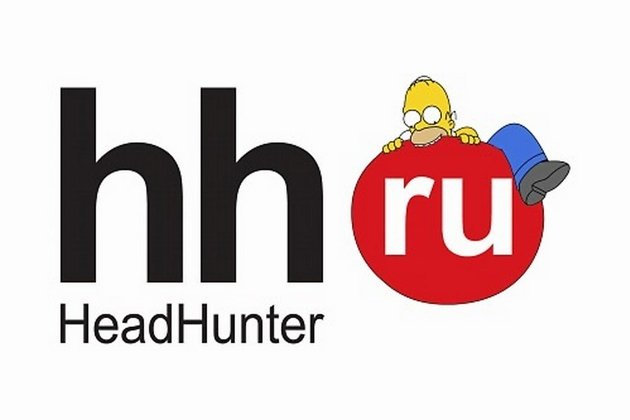

**1. Сбор данных**

Соберите данные о вакансии Data Scientist по Москве в одну таблицу и подготовьте их для анализа. Часто в индустрии подготовленные для анализа таблицы называют *витринами*. В ней должны быть:
- название вакансии,
- работодатель,
- зарплатная вилка,
- станция метро,
- ссылка на вакансию,
- опыт,
- требуемые навыки,
- что-то еще по вашему желанию.

Креативность приветствуется. При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. 

**При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер HeadHunter.**

Пример запроса к API:

In [151]:
URL = 'https://api.hh.ru/vacancies'

proxies = {
    'https': '51.158.123.35:9999'
}

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params, proxies=proxies)
data = json.loads(req.content.decode())

In [152]:
data['found']

339

Можем узнать сколько всего найдено запросов с помощью поля `found`, то есть нам надо сделать 4 шага по 100 страниц:

In [153]:
all_got_info = []

for page in range(0, 35):
    params = {
        'text': "Data Scientist",
        'area': 1,
        'page': page,
        'per_page': 10
    }

    req = requests.get(URL, params, proxies=proxies)
    data = json.loads(req.content.decode())
    all_got_info += data['items']

pd_data = pd.json_normalize(all_got_info)

In [154]:
pd_data

id  premium                                               name  \
0    44150000    False                              Стажер data scientist   
1    44132320    False                            Аналитик Data Scientist   
2    43896076    False      Data Scientist в области компьютерного зрения   
3    42857558    False  Data Scientist / Machine Learning Engineer // ...   
4    43471916    False           Data Scientist / Quantitative Researcher   
..        ...      ...                                                ...   
334  43369577    False  Руководитель направления разработки моделей оц...   
335  41733915    False   Client Consultant (market research, FMCG sector)   
336  43373281    False  Data Scientist в департамент по работе с пробл...   
337  42916086    False                        Product Manager (Analytics)   
338  42779428    False  Java Developer (Система управления знаниями и ...   

     has_test  response_letter_required  salary  address response_url  \
0       False                     False     NaN      NaN         None   
1       False                     False     NaN      NaN         None   
2       False                     False     NaN      NaN         None   
3       False                     False     NaN      NaN         None   
4       False                      True     NaN      NaN         None   
..        ...                       ...     ...      ...          ...   
334     False                     False     NaN      NaN         None   
335     False                     False     NaN      NaN         None   
336     False                     False     NaN      NaN         None   
337     False                     False     NaN      NaN         None   
338     False                     False     NaN      NaN         None   

    sort_point_distance              published_at  ... address.metro  \
0                  None  2021-04-23T14:53:25+0300  ...           NaN   
1                  None  2021-04-23T06:14:45+0300  ...           NaN   
2                  None  2021-04-23T22:09:38+0300  ...           NaN   
3                  None  2021-04-21T13:26:56+0300  ...           NaN   
4                  None  2021-04-23T16:51:25+0300  ...           NaN   
..                  ...                       ...  ...           ...   
334                None  2021-03-26T10:32:30+0300  ...           NaN   
335                None  2021-03-29T10:31:29+0300  ...           NaN   
336                None  2021-03-26T11:45:47+0300  ...           NaN   
337                None  2021-04-06T14:29:08+0300  ...           NaN   
338                None  2021-03-29T10:50:22+0300  ...           NaN   

                                address.metro_stations address.id  \
0                                                  NaN        NaN   
1                                                  NaN        NaN   
2                                                  NaN        NaN   
3                                                   []     445829   
4    [{'station_name': 'Кропоткинская', 'line_name'...     445451   
..                                                 ...        ...   
334                                                NaN        NaN   
335  [{'station_name': 'Тушинская', 'line_name': 'Т...      52915   
336                                                NaN        NaN   
337                                                NaN        NaN   
338  [{'station_name': 'Кутузовская', 'line_name': ...     731097   

    address.metro.station_name     address.metro.line_name  \
0                          NaN                         NaN   
1                          NaN                         NaN   
2                          NaN                         NaN   
3                          NaN                         NaN   
4                Кропоткинская              Сокольническая   
..                         ...                         ...   
334                        NaN                         NaN   
335                

Найдем нужные поля:

In [155]:
pd_data.keys()

Index(['id', 'premium', 'name', 'has_test', 'response_letter_required',
       'salary', 'address', 'response_url', 'sort_point_distance',
       'published_at', 'created_at', 'archived', 'apply_alternate_url', 'url',
       'alternate_url', 'relations', 'contacts', 'working_days',
       'working_time_intervals', 'working_time_modes', 'accept_temporary',
       'department.id', 'department.name', 'area.id', 'area.name', 'area.url',
       'type.id', 'type.name', 'insider_interview.id', 'insider_interview.url',
       'employer.id', 'employer.name', 'employer.url',
       'employer.alternate_url', 'employer.logo_urls.90',
       'employer.logo_urls.original', 'employer.logo_urls.240',
       'employer.vacancies_url', 'employer.trusted', 'snippet.requirement',
       'snippet.responsibility', 'schedule.id', 'schedule.name', 'department',
       'insider_interview', 'salary.from', 'salary.to', 'salary.currency',
       'salary.gross', 'address.city', 'address.street', 'address.building',

В ней должны быть:
- название вакансии,
- работодатель,
- зарплатная вилка,
- станция метро,
- ссылка на вакансию,
- опыт,
- требуемые навыки,
- что-то еще по вашему желанию.


In [156]:
small_data = pd_data[['id', 'name', 'employer.name', 
                      'address.metro.station_name', 'url']]
small_data.head()

id                                               name  \
0  44150000                              Стажер data scientist   
1  44132320                            Аналитик Data Scientist   
2  43896076      Data Scientist в области компьютерного зрения   
3  42857558  Data Scientist / Machine Learning Engineer // ...   
4  43471916           Data Scientist / Quantitative Researcher   

             employer.name address.metro.station_name  \
0   СИБУР, Группа компаний                        NaN   
1                Стоматорг                        NaN   
2  Fair Print & High Store                        NaN   
3                 Wisebits                        NaN   
4         Знаменка Капитал              Кропоткинская   

                                               url  
0  https://api.hh.ru/vacancies/44150000?host=hh.ru  
1  https://api.hh.ru/vacancies/44132320?host=hh.ru  
2  https://api.hh.ru/vacancies/43896076?host=hh.ru  
3  https://api.hh.ru/vacancies/42857558?host=hh.ru  
4  https://api.hh.ru/vacancies/43471916?host=hh.ru

Кажется, мы не смогли найти опыт и требуемые навыки. Для этого придется создать еще запросы:

In [157]:
all_got_info = []

for id_ in pd_data['id']:
    print('processing id:', id_, end=' ')
    new_url = URL + f'/{id_}'
    
    req = requests.get(new_url, proxies=proxies)
    if req.status_code == 200:
        print('success')
    else:
        print('failed')
        continue
    data = json.loads(req.content.decode())
    
    all_got_info += [{'id':data['id'],
                      'salary': data['salary'],
                      'experience':data['experience'],
                      'key_skills':data['key_skills']}]


processing id: 44150000 success
processing id: 44132320 success
processing id: 43896076 success
processing id: 42857558 success
processing id: 43471916 success
processing id: 43825932 success
processing id: 42683816 success
processing id: 43766237 success
processing id: 43354290 success
processing id: 44111453 success
processing id: 42011548 success
processing id: 43357165 success
processing id: 43608616 success
processing id: 44137474 success
processing id: 44035419 success
processing id: 43505073 success
processing id: 43425637 success
processing id: 42956307 success
processing id: 44121772 success
processing id: 44111346 success
processing id: 43711132 success
processing id: 39416083 success
processing id: 43661985 success
processing id: 42493107 success
processing id: 44080293 success
processing id: 44070312 success
processing id: 44154686 success
processing id: 43809736 success
processing id: 40869614 success
processing id: 43455160 success
processing id: 43122663 success
processi

In [158]:
vacancies = pd.json_normalize(all_got_info)
vacancies

id  salary                                         key_skills  \
0    44150000     NaN  [{'name': 'Python'}, {'name': 'SQL'}, {'name':...   
1    44132320     NaN  [{'name': 'Python'}, {'name': 'MS Visio'}, {'n...   
2    43896076     NaN  [{'name': 'C++'}, {'name': 'Тестирование'}, {'...   
3    42857558     NaN  [{'name': 'Python'}, {'name': 'Git'}, {'name':...   
4    43471916     NaN  [{'name': 'Mathematical Statistics'}, {'name':...   
..        ...     ...                                                ...   
334  43369577     NaN                                                 []   
335  41733915     NaN  [{'name': 'Market Research'}, {'name': 'Маркет...   
336  43373281     NaN                                                 []   
337  42916086     NaN  [{'name': 'Python'}, {'name': 'Agile Project M...   
338  42779428     NaN  [{'name': 'Git'}, {'name': 'Hibernate ORM'}, {...   

    experience.id     experience.name  salary.from  salary.to salary.currency  \
0    noExperience           Нет опыта          NaN        NaN             NaN   
1    between1And3  От 1 года до 3 лет     180000.0   250000.0             RUR   
2    noExperience           Нет опыта     150000.0   150000.0             RUR   
3    between1And3  От 1 года до 3 лет       4000.0        NaN             EUR   
4    between3And6       От 3 до 6 лет     250000.0        NaN             RUR   
..            ...                 ...          ...        ...             ...   
334  between1And3  От 1 года до 3 лет          NaN        NaN             NaN   
335  between1And3  От 1 года до 3 лет          NaN        NaN             NaN   
336  between1And3  От 1 года до 3 лет          NaN        NaN             NaN   
337  between3And6       От 3 до 6 лет          NaN        NaN             NaN   
338  between1And3  От 1 года до 3 лет          NaN        NaN             NaN   

    salary.gross  
0            NaN  
1           True  
2          False  
3          False  
4           True  
..           ...  
334          NaN  
335          NaN  
336          NaN  
337          NaN  
338          NaN  

[339 rows x 9 columns]

Очень странно хранить массив словарей, поэтому:

In [159]:
for i in range(len(vacancies['key_skills'])):
    all_skills = ""
    for j in range(len(vacancies['key_skills'][i])):
        if isinstance(vacancies['key_skills'][i][j], dict):
            all_skills += vacancies['key_skills'][i][j]['name']
            if (j != len(vacancies['key_skills'][i]) - 1):
                all_skills += ", "
    vacancies['key_skills'][i] = all_skills 

/home/illusioncat/anaconda3/envs/ptn37env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [160]:
vacancies

id  salary                                         key_skills  \
0    44150000     NaN                   Python, SQL, R, machine learning   
1    44132320     NaN  Python, MS Visio, Бизнес-анализ, Аналитические...   
2    43896076     NaN  C++, Тестирование, MATLAB, Гарант плюс, Бизнес...   
3    42857558     NaN           Python, Git, SQL, Linux, Английский язык   
4    43471916     NaN  Mathematical Statistics, Mathematical Programm...   
..        ...     ...                                                ...   
334  43369577     NaN                                                      
335  41733915     NaN  Market Research, Маркетинговые исследования, А...   
336  43373281     NaN                                                      
337  42916086     NaN  Python, Agile Project Management, Scrum, Googl...   
338  42779428     NaN      Git, Hibernate ORM, XML, Atlassian Jira, Java   

    experience.id     experience.name  salary.from  salary.to salary.currency  \
0    noExperience           Нет опыта          NaN        NaN             NaN   
1    between1And3  От 1 года до 3 лет     180000.0   250000.0             RUR   
2    noExperience           Нет опыта     150000.0   150000.0             RUR   
3    between1And3  От 1 года до 3 лет       4000.0        NaN             EUR   
4    between3And6       От 3 до 6 лет     250000.0        NaN             RUR   
..            ...                 ...          ...        ...             ...   
334  between1And3  От 1 года до 3 лет          NaN        NaN             NaN   
335  between1And3  От 1 года до 3 лет          NaN        NaN             NaN   
336  between1And3  От 1 года до 3 лет          NaN        NaN             NaN   
337  between3And6       От 3 до 6 лет          NaN        NaN             NaN   
338  between1And3  От 1 года до 3 лет          NaN        NaN             NaN   

    salary.gross  
0            NaN  
1           True  
2          False  
3          False  
4           True  
..           ...  
334          NaN  
335          NaN  
336          NaN  
337          NaN  
338          NaN  

[339 rows x 9 columns]

In [161]:
vacancies = vacancies[['id', 'key_skills', 'experience.name', 'salary.from', 'salary.to', 'salary.currency', 'salary.gross']]

Необходимо объеднить с предыдущей таблицей:

In [162]:
hh_data = pd.merge(small_data, vacancies, how='inner', left_on='id', right_on='id')

In [163]:
hh_data.head()

id                                               name  \
0  44150000                              Стажер data scientist   
1  44132320                            Аналитик Data Scientist   
2  43896076      Data Scientist в области компьютерного зрения   
3  42857558  Data Scientist / Machine Learning Engineer // ...   
4  43471916           Data Scientist / Quantitative Researcher   

             employer.name address.metro.station_name  \
0   СИБУР, Группа компаний                        NaN   
1                Стоматорг                        NaN   
2  Fair Print & High Store                        NaN   
3                 Wisebits                        NaN   
4         Знаменка Капитал              Кропоткинская   

                                               url  \
0  https://api.hh.ru/vacancies/44150000?host=hh.ru   
1  https://api.hh.ru/vacancies/44132320?host=hh.ru   
2  https://api.hh.ru/vacancies/43896076?host=hh.ru   
3  https://api.hh.ru/vacancies/42857558?host=hh.ru   
4  https://api.hh.ru/vacancies/43471916?host=hh.ru   

                                          key_skills     experience.name  \
0                   Python, SQL, R, machine learning           Нет опыта   
1  Python, MS Visio, Бизнес-анализ, Аналитические...  От 1 года до 3 лет   
2  C++, Тестирование, MATLAB, Гарант плюс, Бизнес...           Нет опыта   
3           Python, Git, SQL, Linux, Английский язык  От 1 года до 3 лет   
4  Mathematical Statistics, Mathematical Programm...       От 3 до 6 лет   

   salary.from  salary.to salary.currency salary.gross  
0          NaN        NaN             NaN          NaN  
1     180000.0   250000.0             RUR         True  
2     150000.0   150000.0             RUR        False  
3       4000.0        NaN             EUR        False  
4     250000.0        NaN             RUR         True

Как-то маловато данных, добавим так же смежные области (Аналитик данных, Quantitative Researcher, Machine Learning Engineer, Data Engineer, Marketing analyst).

In [168]:
def correct_exp(data_frame):
    '''
    Исправления массива опыта в строку из перечисленных навыков.
    Читабельный вид и при обработке достаточно воспользоваться split()
    '''
    for i in range(len(data_frame['key_skills'])):
        all_skills = ""
        for j in range(len(data_frame['key_skills'][i])):
            if isinstance(data_frame['key_skills'][i][j], dict):
                all_skills += data_frame['key_skills'][i][j]['name']
                if (j != len(data_frame['key_skills'][i]) - 1):
                    all_skills += ", "
        data_frame['key_skills'][i] = all_skills 

    
def find_vacancies(name):
    '''
    Поиск вакансий по соответствующему названию.
    '''
    URL = 'https://api.hh.ru/vacancies'

    params = {
        'text': name,
        'area': 1,
        'page': 0,
        'per_page': 40
    }

    counter = 0
    req = requests.get(URL, params, proxies=proxies)
    data = json.loads(req.content.decode())
    max_count = data['found'] # Сколько нашлось по данному запросу
    
    all_got_info = []

    # Проходим по всем запросам 
    for page in range(0, max_count//40 + 1):
        params = {
            'text': name,
            'area': 1,
            'page': page,
            'per_page': 40
        }

        req = requests.get(URL, params, proxies=proxies)
        counter += 1
        if counter % 300 == 0:
            sleep(1)
        
        data = json.loads(req.content.decode())
        all_got_info += data['items']

    pd_data = pd.json_normalize(all_got_info)
    small_data = pd_data[['id', 'name', 'employer.name', 
                      'address.metro.station_name', 'url']]

    all_got_info = []

    # Находим для каждой вакансии дополнительную информацию о
    # вакансии (опыт, заработная плата)
    for id_ in pd_data['id']:
        print('processing id:', id_, end=' ')
        new_url = URL + f'/{id_}'

        req = requests.get(new_url, proxies=proxies)
        
        counter += 1
        if counter % 300 == 0:
            sleep(1)
        
        if req.status_code == 200:
            print('success')
        else:
            print('failed')
            req = requests.get(new_url, proxies=proxies)
        data = json.loads(req.content.decode())

        all_got_info += [{'id':data['id'],
                          'salary': data['salary'],
                          'experience':data['experience'],
                          'key_skills':data['key_skills']}]
        
    vacancies = pd.json_normalize(all_got_info)

    correct_exp(vacancies)
    vacancies = vacancies[['id', 'key_skills', 'experience.name',
                           'salary.from', 'salary.to', 'salary.currency', 'salary.gross']]
    hh_data = pd.merge(small_data, vacancies, how='inner', left_on='id', right_on='id')
    return hh_data

In [169]:
data_analyst = find_vacancies('Data analyst')

processing id: 43907208 success
processing id: 44132320 success
processing id: 41469811 success
processing id: 44150000 success
processing id: 43920673 success
processing id: 44146175 success
processing id: 44119271 success
processing id: 44035419 success
processing id: 43711132 success
processing id: 44124071 success
processing id: 42011548 success
processing id: 44002947 success
processing id: 44107671 success
processing id: 43757805 success
processing id: 43698972 success
processing id: 44137474 success
processing id: 43354290 success
processing id: 43930665 success
processing id: 43491750 success
processing id: 44121772 success
processing id: 43850988 success
processing id: 42956307 success
processing id: 44146950 success
processing id: 44086180 success
processing id: 43041417 success
processing id: 42883155 success
processing id: 44162114 success
processing id: 43162948 success
processing id: 43376843 success
processing id: 43601621 success
processing id: 43734534 success
processi

processing id: 44104657 success
processing id: 43755225 success
processing id: 44112825 success
processing id: 44125492 success
processing id: 43662616 success
processing id: 43545166 success
processing id: 43201449 success
processing id: 43566457 success
processing id: 43638312 success
processing id: 42601714 success
processing id: 43326960 success
processing id: 43110170 success
processing id: 43820203 success
processing id: 43451190 success
processing id: 41512086 success
processing id: 44040683 success
processing id: 44140554 success
processing id: 43473215 success
processing id: 42871588 success
processing id: 43414052 success
processing id: 42493119 success
processing id: 44090571 success
processing id: 44090140 success
processing id: 44103523 success
processing id: 43471076 success
processing id: 40790804 success
processing id: 43996027 success
processing id: 40255446 success
processing id: 43505365 success
processing id: 40493401 success
processing id: 44120720 success
processi

processing id: 43111054 success
processing id: 42899023 success
processing id: 43928604 success
processing id: 41850701 success
processing id: 37897654 success
processing id: 43915739 success
processing id: 43983940 success
processing id: 43171995 success
processing id: 40867476 success
processing id: 43928834 success
processing id: 43946240 success
processing id: 43943334 success
processing id: 43917631 success
processing id: 42657433 success
processing id: 43893527 success
processing id: 42261298 success
processing id: 43056618 success
processing id: 43383550 success
processing id: 43939454 success
processing id: 42413328 success
processing id: 43112951 success
processing id: 43068612 success
processing id: 43925525 success
processing id: 43928179 success
processing id: 43894001 success
processing id: 43955786 success
processing id: 42534786 success
processing id: 43925733 success
processing id: 42982850 success
processing id: 43959613 success
processing id: 43935747 success
processi

processing id: 43471664 success
processing id: 35604234 success
processing id: 35447374 success
processing id: 42628648 success
processing id: 43537385 success
processing id: 42730762 success
processing id: 43487026 success
processing id: 41895970 success
processing id: 43503524 success
processing id: 43351654 success
processing id: 41824493 success
processing id: 43058275 success
processing id: 43474072 success
processing id: 43370540 success
processing id: 43389601 success
processing id: 42800752 success
processing id: 43161022 success
processing id: 43435157 success
processing id: 43359155 success
processing id: 43354251 success
processing id: 42715546 success
processing id: 42086976 success
processing id: 43537661 success
processing id: 42571117 success
processing id: 41059129 success
processing id: 43413982 success
processing id: 42600912 success
processing id: 43448571 success
processing id: 43359676 success
processing id: 39588947 success
processing id: 41180437 success
processi

/home/illusioncat/anaconda3/envs/ptn37env/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [170]:
data_analyst.head()

id                     name           employer.name  \
0  43907208     Junior Data Engineer           Платформа ОФД   
1  44132320  Аналитик Data Scientist               Стоматорг   
2  41469811            Data Engineer            Айти-Солюшнс   
3  44150000    Стажер data scientist  СИБУР, Группа компаний   
4  43920673      Junior Data Analyst                HASH CIB   

  address.metro.station_name                                              url  \
0                    Лужники  https://api.hh.ru/vacancies/43907208?host=hh.ru   
1                        NaN  https://api.hh.ru/vacancies/44132320?host=hh.ru   
2               Алексеевская  https://api.hh.ru/vacancies/41469811?host=hh.ru   
3                        NaN  https://api.hh.ru/vacancies/44150000?host=hh.ru   
4                        NaN  https://api.hh.ru/vacancies/43920673?host=hh.ru   

                                          key_skills     experience.name  \
0                                                     От 1 года до 3 лет   
1  Python, MS Visio, Бизнес-анализ, Аналитические...  От 1 года до 3 лет   
2  SQL, Английский язык, Работа в команде, Работа...       От 3 до 6 лет   
3                   Python, SQL, R, machine learning           Нет опыта   
4  Анализ данных, Автоматизация процессов, Python...           Нет опыта   

   salary.from  salary.to salary.currency salary.gross  
0     100000.0   150000.0             RUR        False  
1     180000.0   250000.0             RUR         True  
2     250000.0        NaN             RUR        False  
3          NaN        NaN             NaN          NaN  
4          NaN        NaN             NaN          NaN

In [171]:
qr = find_vacancies('Quantitative Researcher')

processing id: 43570957 success
processing id: 43377570 success
processing id: 43471916 success
processing id: 38106312 success
processing id: 40561414 success
processing id: 38106294 success
processing id: 43959987 success
processing id: 42629377 success
processing id: 43817572 success
processing id: 38106273 success
processing id: 43460660 success
processing id: 43237549 success
processing id: 43687907 success
processing id: 44157740 success
processing id: 43960436 success
processing id: 43373191 success
processing id: 43854398 success
processing id: 43129759 success
processing id: 43716151 success
processing id: 43356947 success
processing id: 43459775 success
processing id: 42468574 success
processing id: 44090571 success
processing id: 44158952 success
processing id: 43718745 success
processing id: 43647287 success
processing id: 42964452 success
processing id: 41993936 success
processing id: 44151963 success
processing id: 43421552 success
processing id: 43998586 success
processi

/home/illusioncat/anaconda3/envs/ptn37env/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [172]:
qr.head()

id                                               name  \
0  43570957                        Quantitative researcher С++   
1  43377570                     Junior Quantitative Researcher   
2  43471916           Data Scientist / Quantitative Researcher   
3  38106312  Разработчик алгоритмических торговых систем / ...   
4  40561414                            Quantitative Researcher   

      employer.name address.metro.station_name  \
0      Gara.capital                        NaN   
1       Alber Blanc                        NaN   
2  Знаменка Капитал              Кропоткинская   
3      Алго Капитал                        NaN   
4         Red Cedar                        NaN   

                                               url  \
0  https://api.hh.ru/vacancies/43570957?host=hh.ru   
1  https://api.hh.ru/vacancies/43377570?host=hh.ru   
2  https://api.hh.ru/vacancies/43471916?host=hh.ru   
3  https://api.hh.ru/vacancies/38106312?host=hh.ru   
4  https://api.hh.ru/vacancies/40561414?host=hh.ru   

                                          key_skills     experience.name  \
0  Математическая статистика, C++, Математический...           Нет опыта   
1  MATLAB, C/C++, Математическая статистика, Pyth...  От 1 года до 3 лет   
2  Mathematical Statistics, Mathematical Programm...       От 3 до 6 лет   
3                                                     От 1 года до 3 лет   
4                                                     От 1 года до 3 лет   

   salary.from  salary.to salary.currency salary.gross  
0     400000.0        NaN             RUR         True  
1     250000.0        NaN             RUR        False  
2     250000.0        NaN             RUR         True  
3     180000.0        NaN             RUR         True  
4     350000.0        NaN             RUR         True

In [173]:
ml = find_vacancies('Machine Learning Engineer')

processing id: 44160662 success
processing id: 42857558 success
processing id: 43249913 success
processing id: 43474680 success
processing id: 43508827 success
processing id: 42661649 success
processing id: 41983480 success
processing id: 43357165 success
processing id: 44111346 success
processing id: 44081531 success
processing id: 43835732 success
processing id: 41701739 success
processing id: 43647963 success
processing id: 44116801 success
processing id: 44053050 success
processing id: 43931129 success
processing id: 43038508 success
processing id: 44104103 success
processing id: 44042950 success
processing id: 44157740 success
processing id: 43249898 success
processing id: 43537937 success
processing id: 39042422 success
processing id: 38324558 success
processing id: 42108967 success
processing id: 44111436 success
processing id: 41845516 success
processing id: 43248692 success
processing id: 43959754 success
processing id: 44157875 success
processing id: 44011270 success
processi

/home/illusioncat/anaconda3/envs/ptn37env/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [174]:
ml.head()

id                                               name  \
0  44160662      AI / Machine Learning / Deep Learning Инженер   
1  42857558  Data Scientist / Machine Learning Engineer // ...   
2  43249913            Senior Machine Learning Engineer (Кипр)   
3  43474680                          Middle/Senior ML Engineer   
4  43508827                          Machine Learning Engineer   

               employer.name address.metro.station_name  \
0                      LuxPM                        NaN   
1                   Wisebits                        NaN   
2  MetaQuotes Software Corp.                        NaN   
3                   Gradient                  Калужская   
4                   Skillbox                        NaN   

                                               url  \
0  https://api.hh.ru/vacancies/44160662?host=hh.ru   
1  https://api.hh.ru/vacancies/42857558?host=hh.ru   
2  https://api.hh.ru/vacancies/43249913?host=hh.ru   
3  https://api.hh.ru/vacancies/43474680?host=hh.ru   
4  https://api.hh.ru/vacancies/43508827?host=hh.ru   

                                          key_skills     experience.name  \
0                  Java, C++, JUnit, Английский язык  От 1 года до 3 лет   
1           Python, Git, SQL, Linux, Английский язык  От 1 года до 3 лет   
2                                                            Более 6 лет   
3                                                     От 1 года до 3 лет   
4  Python, Git, Docker, Pandas, NumPy, NLTK, Deep...  От 1 года до 3 лет   

   salary.from  salary.to salary.currency salary.gross  
0     250000.0   300000.0             RUR         True  
1       4000.0        NaN             EUR        False  
2       4000.0     5000.0             EUR        False  
3     250000.0        NaN             RUR        False  
4          NaN        NaN             NaN          NaN

In [175]:
data_engeneer = find_vacancies('Data Engineer')

processing id: 41469811 success
processing id: 43907208 success
processing id: 43841588 success
processing id: 44124071 success
processing id: 42857558 success
processing id: 44160662 success
processing id: 43357165 success
processing id: 42840765 success
processing id: 44111346 success
processing id: 42777503 success
processing id: 44116621 success
processing id: 43455160 success
processing id: 43767065 success
processing id: 43835732 success
processing id: 42956307 success
processing id: 44081531 success
processing id: 44027760 success
processing id: 43855888 success
processing id: 43271192 success
processing id: 43140339 success
processing id: 42856893 success
processing id: 42053250 success
processing id: 39795880 success
processing id: 44153886 success
processing id: 43974138 success
processing id: 43360838 success
processing id: 43034067 success
processing id: 43853133 success
processing id: 43341449 success
processing id: 43038508 success
processing id: 43850455 success
processi

processing id: 42207742 success
processing id: 44108223 success
processing id: 42276148 success
processing id: 43345789 success
processing id: 43501618 success
processing id: 43852339 success
processing id: 44034050 success
processing id: 44129036 success
processing id: 44002648 success
processing id: 43624709 success
processing id: 43356535 success
processing id: 44151113 success
processing id: 43276938 success
processing id: 44044064 success
processing id: 40993664 success
processing id: 44083321 success
processing id: 44087169 success
processing id: 43872611 success
processing id: 43940938 success
processing id: 42551461 success
processing id: 39798418 success
processing id: 43939327 success
processing id: 42523895 success
processing id: 44104853 success
processing id: 43455116 success
processing id: 44017088 success
processing id: 43926324 success
processing id: 44050266 success
processing id: 44080585 success
processing id: 42040887 success
processing id: 43718854 success
processi

/home/illusioncat/anaconda3/envs/ptn37env/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [176]:
data_engeneer.head()

id                                               name  \
0  41469811                                      Data Engineer   
1  43907208                               Junior Data Engineer   
2  43841588                        Middle/Senior Data Engineer   
3  44124071                                      Data Engineer   
4  42857558  Data Scientist / Machine Learning Engineer // ...   

    employer.name address.metro.station_name  \
0    Айти-Солюшнс               Алексеевская   
1   Платформа ОФД                    Лужники   
2  App in the Air                        NaN   
3        Chatfuel                        NaN   
4        Wisebits                        NaN   

                                               url  \
0  https://api.hh.ru/vacancies/41469811?host=hh.ru   
1  https://api.hh.ru/vacancies/43907208?host=hh.ru   
2  https://api.hh.ru/vacancies/43841588?host=hh.ru   
3  https://api.hh.ru/vacancies/44124071?host=hh.ru   
4  https://api.hh.ru/vacancies/42857558?host=hh.ru   

                                          key_skills     experience.name  \
0  SQL, Английский язык, Работа в команде, Работа...       От 3 до 6 лет   
1                                                     От 1 года до 3 лет   
2            Python, Git, Atlassian Jira, MySQL, SQL  От 1 года до 3 лет   
3  Git, MongoDB, SQL, Python, Ориентация на резул...  От 1 года до 3 лет   
4           Python, Git, SQL, Linux, Английский язык  От 1 года до 3 лет   

   salary.from  salary.to salary.currency salary.gross  
0     250000.0        NaN             RUR        False  
1     100000.0   150000.0             RUR        False  
2       2000.0        NaN             USD        False  
3       2000.0     5000.0             USD        False  
4       4000.0        NaN             EUR        False

In [177]:
market_analyst = find_vacancies('Marketing analyst')

processing id: 43625892 success
processing id: 43607855 success
processing id: 44155992 success
processing id: 43726427 success
processing id: 44064335 success
processing id: 43850399 success
processing id: 43789418 success
processing id: 44052478 success
processing id: 44138604 success
processing id: 43544825 success
processing id: 43855653 success
processing id: 43844984 success
processing id: 40898818 success
processing id: 43030869 success
processing id: 43631253 success
processing id: 43852338 success
processing id: 44006096 success
processing id: 42657433 success
processing id: 43926076 success
processing id: 42799292 success
processing id: 43919176 success
processing id: 43360786 success
processing id: 42772253 success
processing id: 43129454 success
processing id: 43235409 success
processing id: 37356674 success
processing id: 43831614 success
processing id: 43839237 success
processing id: 43823215 success
processing id: 43521561 success
processing id: 43806180 success
processi

/home/illusioncat/anaconda3/envs/ptn37env/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [178]:
market_analyst.head()

id                                               name employer.name  \
0  43625892                  Marketing analyst (global market)     PomaBrush   
1  43607855  Senior/Lead Marketing Analyst Маркетинговый ан...    AppQuantum   
2  44155992                                     Market Analyst         Ipsos   
3  43726427                           Data analyst (marketing)     ПрофХолод   
4  44064335                                Маркетолог-аналитик        Вектор   

  address.metro.station_name                                              url  \
0                        NaN  https://api.hh.ru/vacancies/43625892?host=hh.ru   
1              Автозаводская  https://api.hh.ru/vacancies/43607855?host=hh.ru   
2             Красносельская  https://api.hh.ru/vacancies/44155992?host=hh.ru   
3                        NaN  https://api.hh.ru/vacancies/43726427?host=hh.ru   
4                   Дубровка  https://api.hh.ru/vacancies/44064335?host=hh.ru   

                                          key_skills     experience.name  \
0  Анализ рынка, Market Research, Аналитические и...  От 1 года до 3 лет   
1  ROI, дико плюсить, Marketing Analysis, gamedev...  От 1 года до 3 лет   
2  Английский язык, MS PowerPoint, Статистический...           Нет опыта   
3  Google Analytics, Английский язык, Прогнозиров...  От 1 года до 3 лет   
4  Adobe Photoshop, HTML, Интернет-реклама, Яндек...  От 1 года до 3 лет   

   salary.from  salary.to salary.currency salary.gross  
0          NaN        NaN             NaN          NaN  
1          NaN        NaN             NaN          NaN  
2          NaN        NaN             NaN          NaN  
3          NaN        NaN             NaN          NaN  
4      60000.0        NaN             RUR         True

Сохраним все данные в файлы:

In [179]:
hh_data.to_csv('scientist.csv')
data_analyst.to_csv('data_analyst.csv')
qr.to_csv('qr.csv')
ml.to_csv('ml.csv')
data_engeneer.to_csv('data_engeneer.csv')
market_analyst.to_csv('market_analyst.csv')

Загрузим сохраненные

In [180]:
hh_data = pd.read_csv('scientist.csv')
data_analyst = pd.read_csv('data_analyst.csv')
qr = pd.read_csv('qr.csv')
ml = pd.read_csv('ml.csv')
data_engeneer = pd.read_csv('data_engeneer.csv')
market_analyst = pd.read_csv('market_analyst.csv')

In [181]:
all_vacancies = pd.concat([hh_data, data_analyst, qr, ml, data_engeneer, market_analyst], ignore_index=True)
all_vacancies

Unnamed: 0        id                                               name  \
0              0  44150000                              Стажер data scientist   
1              1  44132320                            Аналитик Data Scientist   
2              2  43896076      Data Scientist в области компьютерного зрения   
3              3  42857558  Data Scientist / Machine Learning Engineer // ...   
4              4  43471916           Data Scientist / Quantitative Researcher   
...          ...       ...                                                ...   
3317         168  40639128                                           Аналитик   
3318         169  43469617           Менеджер по развитию целевого маркетинга   
3319         170  43438689   Интернет-маркетолог/Руководитель Digital проекта   
3320         171  43357453                 Маркетолог-аналитик (г. Жуковский)   
3321         172  43499801       Руководитель проекта (маркетолог - аналитик)   

                       employer.name address.metro.station_name  \
0             СИБУР, Группа компаний                        NaN   
1                          Стоматорг                        NaN   
2            Fair Print & High Store                        NaN   
3                           Wisebits                        NaN   
4                   Знаменка Капитал              Кропоткинская   
...                              ...                        ...   
3317                       HRT Group                        NaN   
3318                          Яндекс                        NaN   
3319   Эмиграционный Центр Garant.in         Сретенский бульвар   
3320  ЧЕТЫРЕ ЛАПЫ, Сеть зоомагазинов                        NaN   
3321                         СП Торг                    Ховрино   

                                                  url  \
0     https://api.hh.ru/vacancies/44150000?host=hh.ru   
1     https://api.hh.ru/vacancies/44132320?host=hh.ru   
2     https://api.hh.ru/vacancies/43896076?host=hh.ru   
3     https://api.hh.ru/vacancies/42857558?host=hh.ru   
4     https://api.hh.ru/vacancies/43471916?host=hh.ru   
...                                               ...   
3317  https://api.hh.ru/vacancies/40639128?host=hh.ru   
3318  https://api.hh.ru/vacancies/43469617?host=hh.ru   
3319  https://api.hh.ru/vacancies/43438689?host=hh.ru   
3320  https://api.hh.ru/vacancies/43357453?host=hh.ru   
3321  https://api.hh.ru/vacancies/43499801?host=hh.ru   

                                             key_skills     experience.name  \
0                      Python, SQL, R, machine learning           Нет опыта   
1     Python, MS Visio, Бизнес-анализ, Аналитические...  От 1 года до 3 лет   
2     C++, Тестирование, MATLAB, Гарант плюс, Бизнес...           Нет опыта   
3              Python, Git, SQL, Linux, Английский язык  От 1 года до 3 лет   
4     Mathematical Statistics, Mathematical Programm...       От 3 до 6 лет   
...                                                 ...                 ...   
3317                                                NaN  От 1 года до 3 лет   
3318  Маркетинговый анализ, CRM, Маркетинговые иссле...  От 1 года до 3 лет   
3319  Google Analytics, Internet Marketing, Яндекс.М...       От 3 до 6 лет   
3320  MS PowerPoint, Маркетинговый анализ, MS Access...  От 1 года до 3 лет   
3321  VBA, MS Access, Английский язык, Прогнозирован...       От 3 до 6 лет   

      salary.from  salary.to salary.currency salary.gross  
0             NaN        NaN             NaN          NaN  
1        180000.0   250000.0             RUR         True  
2        150000.0   150000.0             RUR        False  
3          4000.0        NaN             EUR        False  
4        250000.0        NaN             RUR         True  
...           ...        ...             ...          ...  
3317          NaN        NaN             NaN          NaN  
3318          NaN        NaN             NaN          NaN  
3319      60000.0   120000.0             RUR        Fa

In [182]:
all_vacancies = all_vacancies[['id', 'name', 'employer.name',
       'address.metro.station_name', 'url', 'key_skills', 'experience.name',
       'salary.from', 'salary.to', 'salary.currency', 'salary.gross']]
all_vacancies

id                                               name  \
0     44150000                              Стажер data scientist   
1     44132320                            Аналитик Data Scientist   
2     43896076      Data Scientist в области компьютерного зрения   
3     42857558  Data Scientist / Machine Learning Engineer // ...   
4     43471916           Data Scientist / Quantitative Researcher   
...        ...                                                ...   
3317  40639128                                           Аналитик   
3318  43469617           Менеджер по развитию целевого маркетинга   
3319  43438689   Интернет-маркетолог/Руководитель Digital проекта   
3320  43357453                 Маркетолог-аналитик (г. Жуковский)   
3321  43499801       Руководитель проекта (маркетолог - аналитик)   

                       employer.name address.metro.station_name  \
0             СИБУР, Группа компаний                        NaN   
1                          Стоматорг                        NaN   
2            Fair Print & High Store                        NaN   
3                           Wisebits                        NaN   
4                   Знаменка Капитал              Кропоткинская   
...                              ...                        ...   
3317                       HRT Group                        NaN   
3318                          Яндекс                        NaN   
3319   Эмиграционный Центр Garant.in         Сретенский бульвар   
3320  ЧЕТЫРЕ ЛАПЫ, Сеть зоомагазинов                        NaN   
3321                         СП Торг                    Ховрино   

                                                  url  \
0     https://api.hh.ru/vacancies/44150000?host=hh.ru   
1     https://api.hh.ru/vacancies/44132320?host=hh.ru   
2     https://api.hh.ru/vacancies/43896076?host=hh.ru   
3     https://api.hh.ru/vacancies/42857558?host=hh.ru   
4     https://api.hh.ru/vacancies/43471916?host=hh.ru   
...                                               ...   
3317  https://api.hh.ru/vacancies/40639128?host=hh.ru   
3318  https://api.hh.ru/vacancies/43469617?host=hh.ru   
3319  https://api.hh.ru/vacancies/43438689?host=hh.ru   
3320  https://api.hh.ru/vacancies/43357453?host=hh.ru   
3321  https://api.hh.ru/vacancies/43499801?host=hh.ru   

                                             key_skills     experience.name  \
0                      Python, SQL, R, machine learning           Нет опыта   
1     Python, MS Visio, Бизнес-анализ, Аналитические...  От 1 года до 3 лет   
2     C++, Тестирование, MATLAB, Гарант плюс, Бизнес...           Нет опыта   
3              Python, Git, SQL, Linux, Английский язык  От 1 года до 3 лет   
4     Mathematical Statistics, Mathematical Programm...       От 3 до 6 лет   
...                                                 ...                 ...   
3317                                                NaN  От 1 года до 3 лет   
3318  Маркетинговый анализ, CRM, Маркетинговые иссле...  От 1 года до 3 лет   
3319  Google Analytics, Internet Marketing, Яндекс.М...       От 3 до 6 лет   
3320  MS PowerPoint, Маркетинговый анализ, MS Access...  От 1 года до 3 лет   
3321  VBA, MS Access, Английский язык, Прогнозирован...       От 3 до 6 лет   

      salary.from  salary.to salary.currency salary.gross  
0             NaN        NaN             NaN          NaN  
1        180000.0   250000.0             RUR         True  
2        150000.0   150000.0             RUR        False  
3          4000.0        NaN             EUR        False  
4        250000.0        NaN             RUR         True  
...           ...        ...             ...          ...  
3317          NaN        NaN             NaN          NaN  
3318          NaN        NaN             NaN          NaN  
3319      60000.0   120000.0             RUR        False  
3320          NaN        NaN             NaN          NaN  
3321     200000.0        NaN             RUR        False  

[3322 rows x 11 columns

In [349]:
all_vacancies.to_csv('all_vacancies.csv')

**2. Анализ и визуализация данных**

Проведите исследование получившихся данных. Прежде всего убедитесь, что ваши данные чистые. Убедитесь, что вы проделали следующее:
- удаление дубликатов,
- предобработка пропусков,
- предобработка текстовых данных.

Среди вакансий можно выделять группы. *Например*, бизнес-аналитик, BI аналитик, продуктовый аналитик.

Ответьте не следующие вопросы:  
- Сколько сейчас доступно вакансий по вашему запросу?
- Выделяются ли среди вакансий какие-то группы? 
- Какие группы вакансий самые популярные?
- Какова средняя и медианная заработная плата?
- Какие ключевые навыки требуются для данной вакансии?
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию &mdash; для этого используйте библиотеку plotly. Постройте следующие графики:
- гистограмма распределения заработной платы;
- heatmap, отображающий зависимость количества вакансий от группы и навыка;
- зависимость средней заработной платы от требуемых навыков;
- распределение средней заработной платы по карте Москвы;
- распределение спроса на вакансию по карте Москвы.

Для построения последних двух графиков вам могут понадобиться <a target="_blank" href="http://www.lovrikinfo.ru/metrogps.php">внешние данные</a>.


- удаление дубликатов

In [4]:
all_vacancies.drop_duplicates(inplace=True)
all_vacancies

id                                               name  \
0     44150000                              Стажер data scientist   
1     44132320                            Аналитик Data Scientist   
2     43896076      Data Scientist в области компьютерного зрения   
3     42857558  Data Scientist / Machine Learning Engineer // ...   
4     43471916           Data Scientist / Quantitative Researcher   
...        ...                                                ...   
2580  40639128                                           Аналитик   
2581  43469617           Менеджер по развитию целевого маркетинга   
2582  43438689   Интернет-маркетолог/Руководитель Digital проекта   
2583  43357453                 Маркетолог-аналитик (г. Жуковский)   
2584  43499801       Руководитель проекта (маркетолог - аналитик)   

                       employer.name address.metro.station_name  \
0             СИБУР, Группа компаний              не определено   
1                          Стоматорг              не определено   
2            Fair Print & High Store              не определено   
3                           Wisebits              не определено   
4                   Знаменка Капитал              Кропоткинская   
...                              ...                        ...   
2580                       HRT Group              не определено   
2581                          Яндекс              не определено   
2582   Эмиграционный Центр Garant.in         Сретенский бульвар   
2583  ЧЕТЫРЕ ЛАПЫ, Сеть зоомагазинов              не определено   
2584                         СП Торг                    Ховрино   

                                                  url  \
0     https://api.hh.ru/vacancies/44150000?host=hh.ru   
1     https://api.hh.ru/vacancies/44132320?host=hh.ru   
2     https://api.hh.ru/vacancies/43896076?host=hh.ru   
3     https://api.hh.ru/vacancies/42857558?host=hh.ru   
4     https://api.hh.ru/vacancies/43471916?host=hh.ru   
...                                               ...   
2580  https://api.hh.ru/vacancies/40639128?host=hh.ru   
2581  https://api.hh.ru/vacancies/43469617?host=hh.ru   
2582  https://api.hh.ru/vacancies/43438689?host=hh.ru   
2583  https://api.hh.ru/vacancies/43357453?host=hh.ru   
2584  https://api.hh.ru/vacancies/43499801?host=hh.ru   

                                             key_skills     experience.name  \
0                      Python, SQL, R, machine learning           Нет опыта   
1     Python, MS Visio, Бизнес-анализ, Аналитические...  От 1 года до 3 лет   
2     C++, Тестирование, MATLAB, Гарант плюс, Бизнес...           Нет опыта   
3              Python, Git, SQL, Linux, Английский язык  От 1 года до 3 лет   
4     Mathematical Statistics, Mathematical Programm...       От 3 до 6 лет   
...                                                 ...                 ...   
2580                                                NaN  От 1 года до 3 лет   
2581  Маркетинговый анализ, CRM, Маркетинговые иссле...  От 1 года до 3 лет   
2582  Google Analytics, Internet Marketing, Яндекс.М...       От 3 до 6 лет   
2583  MS PowerPoint, Маркетинговый анализ, MS Access...  От 1 года до 3 лет   
2584  VBA, MS Access, Английский язык, Прогнозирован...       От 3 до 6 лет   

      salary.from  salary.to salary.currency salary.gross  
0             NaN        NaN             NaN          NaN  
1        180000.0   250000.0             RUB         True  
2        150000.0   150000.0             RUB        False  
3        360000.0        NaN             RUB        False  
4        250000.0        NaN             RUB         True  
...           ...        ...             ...          ...  
2580          NaN        NaN             NaN          NaN  
2581          NaN        NaN             NaN          NaN  
2582      60000.0   120000.0             RUB        False  
2583          NaN        NaN             NaN          NaN  
2584     200000.0        NaN             RUB        False  

[2585 rows x 11 columns

- предобработка пропусков

**Комментарий**. Так как пропуски в разных колонках имеют разное значение и по-разному должны быть обработаны, то проверим отдельно по каждой колонке:

In [5]:
all_vacancies[all_vacancies['employer.name'].isna()]

Empty DataFrame
Columns: [id, name, employer.name, address.metro.station_name, url, key_skills, experience.name, salary.from, salary.to, salary.currency, salary.gross]
Index: []

In [6]:
all_vacancies[all_vacancies['salary.from'].isna()]

id                                               name  \
0     44150000                              Стажер data scientist   
7     43766237                  Data scientists, Младший (Junior)   
8     43354290           Ведущий аналитик данных / Data Scientist   
9     44111453                                     Data Scientist   
12    43608616                                     Data Scientist   
...        ...                                                ...   
2578  41446975                                Маркетолог-аналитик   
2579  43598196  Ведущий менеджер проекта по развитию продаж (B...   
2580  40639128                                           Аналитик   
2581  43469617           Менеджер по развитию целевого маркетинга   
2583  43357453                 Маркетолог-аналитик (г. Жуковский)   

                       employer.name address.metro.station_name  \
0             СИБУР, Группа компаний              не определено   
7                     КВАНТ ПРОГРАММ                     Перово   
8                          ГЕТСИЭРЭМ             Площадь Ильича   
9              Outlines Technologies              не определено   
12                         Гудфокаст                  Калужская   
...                              ...                        ...   
2578                            Циан              не определено   
2579             Группа компаний ЗТИ              не определено   
2580                       HRT Group              не определено   
2581                          Яндекс              не определено   
2583  ЧЕТЫРЕ ЛАПЫ, Сеть зоомагазинов              не определено   

                                                  url  \
0     https://api.hh.ru/vacancies/44150000?host=hh.ru   
7     https://api.hh.ru/vacancies/43766237?host=hh.ru   
8     https://api.hh.ru/vacancies/43354290?host=hh.ru   
9     https://api.hh.ru/vacancies/44111453?host=hh.ru   
12    https://api.hh.ru/vacancies/43608616?host=hh.ru   
...                                               ...   
2578  https://api.hh.ru/vacancies/41446975?host=hh.ru   
2579  https://api.hh.ru/vacancies/43598196?host=hh.ru   
2580  https://api.hh.ru/vacancies/40639128?host=hh.ru   
2581  https://api.hh.ru/vacancies/43469617?host=hh.ru   
2583  https://api.hh.ru/vacancies/43357453?host=hh.ru   

                                             key_skills     experience.name  \
0                      Python, SQL, R, machine learning           Нет опыта   
7     Машинное обучение, Deep Learning, Нейронные се...  От 1 года до 3 лет   
8                                                   NaN       От 3 до 6 лет   
9     ML, Машинное обучение, Data Analysis, Data Sci...  От 1 года до 3 лет   
12    SQL, Статистический анализ, Анализ данных, Маш...           Нет опыта   
...                                                 ...                 ...   
2578  SWOT анализ, B2B Продажи, Маркетинговый анализ...       От 3 до 6 лет   
2579  Английский язык, Маркетинговый анализ, Запуск ...  От 1 года до 3 лет   
2580                                                NaN  От 1 года до 3 лет   
2581  Маркетинговый анализ, CRM, Маркетинговые иссле...  От 1 года до 3 лет   
2583  MS PowerPoint, Маркетинговый анализ, MS Access...  От 1 года до 3 лет   

      salary.from  salary.to salary.currency salary.gross  
0             NaN        NaN             NaN          NaN  
7             NaN        NaN             NaN          NaN  
8             NaN   300000.0             RUB         True  
9             NaN        NaN             NaN          NaN  
12            NaN        NaN             NaN          NaN  
...           ...        ...             ...          ...  
2578          NaN        NaN             NaN          NaN  
2579          NaN        NaN             NaN          NaN  
2580          NaN        NaN             NaN          NaN  
2581          NaN        NaN             NaN          NaN  
2583          NaN        NaN             NaN          NaN  

[2190 rows x 11 columns

In [7]:
all_vacancies[all_vacancies['salary.to'].isna()]

id                                               name  \
0     44150000                              Стажер data scientist   
3     42857558  Data Scientist / Machine Learning Engineer // ...   
4     43471916           Data Scientist / Quantitative Researcher   
5     43825932                              Junior Data Scientist   
7     43766237                  Data scientists, Младший (Junior)   
...        ...                                                ...   
2579  43598196  Ведущий менеджер проекта по развитию продаж (B...   
2580  40639128                                           Аналитик   
2581  43469617           Менеджер по развитию целевого маркетинга   
2583  43357453                 Маркетолог-аналитик (г. Жуковский)   
2584  43499801       Руководитель проекта (маркетолог - аналитик)   

                                          employer.name  \
0                                СИБУР, Группа компаний   
3                                              Wisebits   
4                                      Знаменка Капитал   
5     Институт прикладных экономических исследований...   
7                                        КВАНТ ПРОГРАММ   
...                                                 ...   
2579                                Группа компаний ЗТИ   
2580                                          HRT Group   
2581                                             Яндекс   
2583                     ЧЕТЫРЕ ЛАПЫ, Сеть зоомагазинов   
2584                                            СП Торг   

     address.metro.station_name  \
0                 не определено   
3                 не определено   
4                 Кропоткинская   
5                  Юго-Западная   
7                        Перово   
...                         ...   
2579              не определено   
2580              не определено   
2581              не определено   
2583              не определено   
2584                    Ховрино   

                                                  url  \
0     https://api.hh.ru/vacancies/44150000?host=hh.ru   
3     https://api.hh.ru/vacancies/42857558?host=hh.ru   
4     https://api.hh.ru/vacancies/43471916?host=hh.ru   
5     https://api.hh.ru/vacancies/43825932?host=hh.ru   
7     https://api.hh.ru/vacancies/43766237?host=hh.ru   
...                                               ...   
2579  https://api.hh.ru/vacancies/43598196?host=hh.ru   
2580  https://api.hh.ru/vacancies/40639128?host=hh.ru   
2581  https://api.hh.ru/vacancies/43469617?host=hh.ru   
2583  https://api.hh.ru/vacancies/43357453?host=hh.ru   
2584  https://api.hh.ru/vacancies/43499801?host=hh.ru   

                                             key_skills     experience.name  \
0                      Python, SQL, R, machine learning           Нет опыта   
3              Python, Git, SQL, Linux, Английский язык  От 1 года до 3 лет   
4     Mathematical Statistics, Mathematical Programm...       От 3 до 6 лет   
5     PyTorch, TensorFlow, Scikit-learn, xgboost, Py...  От 1 года до 3 лет   
7     Машинное обучение, Deep Learning, Нейронные се...  От 1 года до 3 лет   
...                                                 ...                 ...   
2579  Английский язык, Маркетинговый анализ, Запуск ...  От 1 года до 3 лет   
2580                                                NaN  От 1 года до 3 лет   
2581  Маркетинговый анализ, CRM, Маркетинговые иссле...  От 1 года до 3 лет   
2583  MS PowerPoint, Маркетинговый анализ, MS Access...  От 1 года до 3 лет   
2584  VBA, MS Access, Английский язык, Прогнозирован...       От 3 до 6 лет   

      salary.from  salary.to salary.currency salary.gross  
0             NaN        NaN             NaN          NaN  
3        360000.0        NaN             RUB        False  
4        250000.0        NaN             RUB         True  
5        120000.0        NaN             RUB         True  
7             NaN        NaN             NaN          NaN  
...           ...        ...             ...          ...  

**Замечание** Большая часть вакансий не содержит данных о зарплате. Есть два варианта обработки этого случая: 
* Поставить вместо `NaN` какое-то число, которое будет однозначно представлять пропуск. Но тогда мы исказим значение среднего, ведь оно будет напрямую зависеть от нашего выбора.
* Обрабатывать только известные данные. Тогда у нас имеется маленькая выборка и информация будет не самой точной.

Я считаю, что в данном случае оба варианта будут неправильными из-за большого количества пропусков. Мы имеем не более 300 запросов с хорошей информацией о заработной плате, поэтому замена на число приведет к тому, что эти запросы будут принебрежимо малы. В то же время судить по выборке из 300 вакансий не самая лучшая идеия, но увы другой нет, поэтому `NaN` просто не будут участвовать в рассчетах.

In [8]:
all_vacancies[all_vacancies['salary.currency'].isna()]

id                                               name  \
0     44150000                              Стажер data scientist   
7     43766237                  Data scientists, Младший (Junior)   
9     44111453                                     Data Scientist   
12    43608616                                     Data Scientist   
13    44137474             Data Scientist / Аналитик Data Science   
...        ...                                                ...   
2578  41446975                                Маркетолог-аналитик   
2579  43598196  Ведущий менеджер проекта по развитию продаж (B...   
2580  40639128                                           Аналитик   
2581  43469617           Менеджер по развитию целевого маркетинга   
2583  43357453                 Маркетолог-аналитик (г. Жуковский)   

                       employer.name address.metro.station_name  \
0             СИБУР, Группа компаний              не определено   
7                     КВАНТ ПРОГРАММ                     Перово   
9              Outlines Technologies              не определено   
12                         Гудфокаст                  Калужская   
13                          Forecsys              Академическая   
...                              ...                        ...   
2578                            Циан              не определено   
2579             Группа компаний ЗТИ              не определено   
2580                       HRT Group              не определено   
2581                          Яндекс              не определено   
2583  ЧЕТЫРЕ ЛАПЫ, Сеть зоомагазинов              не определено   

                                                  url  \
0     https://api.hh.ru/vacancies/44150000?host=hh.ru   
7     https://api.hh.ru/vacancies/43766237?host=hh.ru   
9     https://api.hh.ru/vacancies/44111453?host=hh.ru   
12    https://api.hh.ru/vacancies/43608616?host=hh.ru   
13    https://api.hh.ru/vacancies/44137474?host=hh.ru   
...                                               ...   
2578  https://api.hh.ru/vacancies/41446975?host=hh.ru   
2579  https://api.hh.ru/vacancies/43598196?host=hh.ru   
2580  https://api.hh.ru/vacancies/40639128?host=hh.ru   
2581  https://api.hh.ru/vacancies/43469617?host=hh.ru   
2583  https://api.hh.ru/vacancies/43357453?host=hh.ru   

                                             key_skills     experience.name  \
0                      Python, SQL, R, machine learning           Нет опыта   
7     Машинное обучение, Deep Learning, Нейронные се...  От 1 года до 3 лет   
9     ML, Машинное обучение, Data Analysis, Data Sci...  От 1 года до 3 лет   
12    SQL, Статистический анализ, Анализ данных, Маш...           Нет опыта   
13    Python, Data Mining, Английский язык, Искусств...  От 1 года до 3 лет   
...                                                 ...                 ...   
2578  SWOT анализ, B2B Продажи, Маркетинговый анализ...       От 3 до 6 лет   
2579  Английский язык, Маркетинговый анализ, Запуск ...  От 1 года до 3 лет   
2580                                                NaN  От 1 года до 3 лет   
2581  Маркетинговый анализ, CRM, Маркетинговые иссле...  От 1 года до 3 лет   
2583  MS PowerPoint, Маркетинговый анализ, MS Access...  От 1 года до 3 лет   

      salary.from  salary.to salary.currency salary.gross  
0             NaN        NaN             NaN          NaN  
7             NaN        NaN             NaN          NaN  
9             NaN        NaN             NaN          NaN  
12            NaN        NaN             NaN          NaN  
13            NaN        NaN             NaN          NaN  
...           ...        ...             ...          ...  
2578          NaN        NaN             NaN          NaN  
2579          NaN        NaN             NaN          NaN  
2580          NaN        NaN             NaN          NaN  
2581          NaN        NaN             NaN          NaN  
2583          NaN        NaN             NaN          NaN  

[2119 rows x 11 columns

**Замечание:** Для большей части мы не знаем в какой валюте выплачивается зарплата. Обработка `NaN` в этом случае зависит от того, что мы хотим узнать. Поэтому будет проведена при необходимости.

In [9]:
all_vacancies[all_vacancies['address.metro.station_name'].isna()]

Empty DataFrame
Columns: [id, name, employer.name, address.metro.station_name, url, key_skills, experience.name, salary.from, salary.to, salary.currency, salary.gross]
Index: []

**Замечание**: Многие вакансии не имеют станций метро. Но это строковое поле, которое мы можем просто заменить на строку `не определено`.

In [10]:
def undefined(x):
    if pd.isna(x):
        return 'не определено'
    else:
        return x

In [11]:
all_vacancies['address.metro.station_name'] = all_vacancies['address.metro.station_name'].apply(undefined)

In [12]:
all_vacancies[all_vacancies['salary.gross'].isna()]

id                                               name  \
0     44150000                              Стажер data scientist   
7     43766237                  Data scientists, Младший (Junior)   
9     44111453                                     Data Scientist   
12    43608616                                     Data Scientist   
13    44137474             Data Scientist / Аналитик Data Science   
...        ...                                                ...   
2578  41446975                                Маркетолог-аналитик   
2579  43598196  Ведущий менеджер проекта по развитию продаж (B...   
2580  40639128                                           Аналитик   
2581  43469617           Менеджер по развитию целевого маркетинга   
2583  43357453                 Маркетолог-аналитик (г. Жуковский)   

                       employer.name address.metro.station_name  \
0             СИБУР, Группа компаний              не определено   
7                     КВАНТ ПРОГРАММ                     Перово   
9              Outlines Technologies              не определено   
12                         Гудфокаст                  Калужская   
13                          Forecsys              Академическая   
...                              ...                        ...   
2578                            Циан              не определено   
2579             Группа компаний ЗТИ              не определено   
2580                       HRT Group              не определено   
2581                          Яндекс              не определено   
2583  ЧЕТЫРЕ ЛАПЫ, Сеть зоомагазинов              не определено   

                                                  url  \
0     https://api.hh.ru/vacancies/44150000?host=hh.ru   
7     https://api.hh.ru/vacancies/43766237?host=hh.ru   
9     https://api.hh.ru/vacancies/44111453?host=hh.ru   
12    https://api.hh.ru/vacancies/43608616?host=hh.ru   
13    https://api.hh.ru/vacancies/44137474?host=hh.ru   
...                                               ...   
2578  https://api.hh.ru/vacancies/41446975?host=hh.ru   
2579  https://api.hh.ru/vacancies/43598196?host=hh.ru   
2580  https://api.hh.ru/vacancies/40639128?host=hh.ru   
2581  https://api.hh.ru/vacancies/43469617?host=hh.ru   
2583  https://api.hh.ru/vacancies/43357453?host=hh.ru   

                                             key_skills     experience.name  \
0                      Python, SQL, R, machine learning           Нет опыта   
7     Машинное обучение, Deep Learning, Нейронные се...  От 1 года до 3 лет   
9     ML, Машинное обучение, Data Analysis, Data Sci...  От 1 года до 3 лет   
12    SQL, Статистический анализ, Анализ данных, Маш...           Нет опыта   
13    Python, Data Mining, Английский язык, Искусств...  От 1 года до 3 лет   
...                                                 ...                 ...   
2578  SWOT анализ, B2B Продажи, Маркетинговый анализ...       От 3 до 6 лет   
2579  Английский язык, Маркетинговый анализ, Запуск ...  От 1 года до 3 лет   
2580                                                NaN  От 1 года до 3 лет   
2581  Маркетинговый анализ, CRM, Маркетинговые иссле...  От 1 года до 3 лет   
2583  MS PowerPoint, Маркетинговый анализ, MS Access...  От 1 года до 3 лет   

      salary.from  salary.to salary.currency salary.gross  
0             NaN        NaN             NaN          NaN  
7             NaN        NaN             NaN          NaN  
9             NaN        NaN             NaN          NaN  
12            NaN        NaN             NaN          NaN  
13            NaN        NaN             NaN          NaN  
...           ...        ...             ...          ...  
2578          NaN        NaN             NaN          NaN  
2579          NaN        NaN             NaN          NaN  
2580          NaN        NaN             NaN          NaN  
2581          NaN        NaN             NaN          NaN  
2583          NaN        NaN             NaN          NaN  

[2119 rows x 11 columns

**Замечание**: Для многих не уточнен параметр `gross`. Заменить в зависимости от цели локально.

In [13]:
all_vacancies[all_vacancies['url'].isna()]

Empty DataFrame
Columns: [id, name, employer.name, address.metro.station_name, url, key_skills, experience.name, salary.from, salary.to, salary.currency, salary.gross]
Index: []

In [14]:
all_vacancies[all_vacancies['key_skills'].isna()]

id                                               name  \
8     43354290           Ведущий аналитик данных / Data Scientist   
20    43711132                                       Data Analyst   
29    43455160                                      Data Engineer   
32    44157501                    Ведущий аналитик Data scientist   
38    43698952                   Data Scientist (computer vision)   
...        ...                                                ...   
2568  43575478                                Маркетолог-аналитик   
2569  43614496  Менеджер по торговому маркетингу (направление ...   
2575  43493083                 Маркетолог-аналитик (недвижимость)   
2576  43471953                  Специалист по целевому маркетингу   
2580  40639128                                           Аналитик   

         employer.name address.metro.station_name  \
8            ГЕТСИЭРЭМ             Площадь Ильича   
20     МАГ Девелопмент              не определено   
29       Платформа ОФД                    Лужники   
32                Ozon              не определено   
38            inDriver                Белорусская   
...                ...                        ...   
2568  Федеральная сеть              не определено   
2569   Компания Арнест              не определено   
2575         Est-a-Tet                 Спортивная   
2576            Яндекс              не определено   
2580         HRT Group              не определено   

                                                  url key_skills  \
8     https://api.hh.ru/vacancies/43354290?host=hh.ru        NaN   
20    https://api.hh.ru/vacancies/43711132?host=hh.ru        NaN   
29    https://api.hh.ru/vacancies/43455160?host=hh.ru        NaN   
32    https://api.hh.ru/vacancies/44157501?host=hh.ru        NaN   
38    https://api.hh.ru/vacancies/43698952?host=hh.ru        NaN   
...                                               ...        ...   
2568  https://api.hh.ru/vacancies/43575478?host=hh.ru        NaN   
2569  https://api.hh.ru/vacancies/43614496?host=hh.ru        NaN   
2575  https://api.hh.ru/vacancies/43493083?host=hh.ru        NaN   
2576  https://api.hh.ru/vacancies/43471953?host=hh.ru        NaN   
2580  https://api.hh.ru/vacancies/40639128?host=hh.ru        NaN   

         experience.name  salary.from  salary.to salary.currency salary.gross  
8          От 3 до 6 лет          NaN   300000.0             RUB         True  
20    От 1 года до 3 лет      70000.0   100000.0             RUB        False  
29    От 1 года до 3 лет          NaN   200000.0             RUB        False  
32    От 1 года до 3 лет          NaN        NaN             NaN          NaN  
38    От 1 года до 3 лет          NaN        NaN             NaN          NaN  
...                  ...          ...        ...             ...          ...  
2568       От 3 до 6 лет          NaN   100000.0             RUB        False  
2569  От 1 года до 3 лет          NaN        NaN             NaN          NaN  
2575  От 1 года до 3 лет          NaN        NaN             NaN          NaN  
2576  От 1 года до 3 лет          NaN        NaN             NaN          NaN  
2580  От 1 года до 3 лет          NaN        NaN             NaN          NaN  

[492 rows x 11 columns]

- предобработка текстовых данных

In [15]:
all_vacancies['name'].nunique()

2090

In [16]:
all_vacancies = all_vacancies.reset_index()

Как видим, есть повторы, но стоит разобраться более подробно. Нам хочется знать, будут ли группы каких-то вакансий по названию.

Как видим множество схожих имен сложно сгруппировать по каким-то признакам, потому что от перестановки слов алгоритм может немного пострадать. Попробуем разделить по каким-либо разделяющим знакам так `/`, `,`, `(`. Не всегда это разделение будет работать корректно, но многие примеры построены на перечислении через эти символы. С помощью уже реализованных функций питона найдем самые часто встречающиеся слова. Эта выборка будет не идеальна, посколько много разделений пройдет не верно и некоторые записи, означающие одни и те же слова написаны на разных языках (русском и английском), но ключевой момент в частоте встречаемости слов, так как самые часто встречаюзиеся категории все еще будут в выделенном топе. 

In [17]:
from collections import Counter

In [18]:
counter = Counter()

In [19]:
def delete_symbol(symbol, string: list):
    '''
    Разделение данных по символу
    '''
    j = 0
    while j < len(string):
        tmp_contanier = string[j].split(symbol)
        
        # не произошло изменения
        if len(tmp_contanier) == 1:
            j += 1
        else:
            string += tmp_contanier
            string.pop(j)            


In [20]:
for i in range(len(all_vacancies['name'])):
    current_name = all_vacancies['name'][i].lower()
    current_name = current_name.split('/')
    
    if isinstance(current_name, str):
        current_name = [current_name]
    
    delete_symbol(',', current_name)
    delete_symbol('(', current_name)
    delete_symbol(')', current_name)
    delete_symbol('+', current_name)
    delete_symbol('\xa0', current_name)
    delete_symbol(':', current_name)
    
    # Не важен уровень разработчика
    delete_symbol('senior', current_name)
    delete_symbol('middle', current_name)
    delete_symbol('lead', current_name)
    delete_symbol('intern', current_name)
    
    for j in range(len(current_name)):
        count = 0
        while (count < len(current_name[j])) and (current_name[j][count] == ' '):
            count += 1
        current_name[j] = current_name[j][count::]
        
        count = 0
        while (count < len(current_name[j])) and (current_name[j][len(current_name[j]) - 1 - count] == ' '):
            count += 1
        current_name[j] = current_name[j][:len(current_name[j]) - count]
        
    counter.update(current_name)


In [21]:
counter.most_common(60)

[('', 1433),
 ('data scientist', 175),
 ('data engineer', 174),
 ('data analyst', 105),
 ('маркетолог-аналитик', 75),
 ('системный аналитик', 60),
 ('аналитик', 50),
 ('аналитик данных', 48),
 ('big data', 42),
 ('java developer', 32),
 ('python', 30),
 ('remote', 30),
 ('product manager', 30),
 ('product analyst', 29),
 ('team', 27),
 ('продуктовый аналитик', 27),
 ('бизнес-аналитик', 26),
 ('qa engineer', 26),
 ('business analyst', 23),
 ('data science', 19),
 ('java', 18),
 ('удаленно', 17),
 ('dwh', 16),
 ('analyst', 16),
 ('ml engineer', 15),
 ('devops инженер', 15),
 ('developer', 15),
 ('qa automation engineer', 15),
 ('c', 15),
 ('junior', 14),
 ('web-аналитик', 14),
 ('sberdevices', 13),
 ('python developer', 13),
 ('интернет-маркетолог', 13),
 ('devops engineer', 12),
 ('machine learning engineer', 11),
 ('product owner', 11),
 ('sql', 11),
 ('devops', 11),
 ('react', 11),
 ('data аналитик', 10),
 ('project manager', 10),
 ('system analyst', 10),
 ('веб-аналитик', 10),
 ('aws

Выделим группы data scientist, data engineer, data analyst, маркетолог-аналитик, системный аналитик, аналитик, product manager, бизнес-аналитик, продуктовый аналитик, qa engineer, ml engineer, web-аналитик, nlp. 

In [22]:
def set_flag(dataframe, name, feature):
    '''
    Добавляет принадлежность к группе
    '''
    dataframe[name] = dataframe['name'].str.lower().str.contains(feature)

In [23]:
set_flag(all_vacancies, 'data scientist', 'data scientist')
set_flag(all_vacancies, 'data engineer', 'data engineer|инженер данных')
set_flag(all_vacancies, 'data analyst', 'data analyst|аналитик данных')
set_flag(all_vacancies, 'маркетолог-аналитик', 'маркетолог-аналитик|marketing analyst')
set_flag(all_vacancies, 'системный аналитик', 'системный аналитик|system analyst')
set_flag(all_vacancies, 'product manager', 'product manager|менеджер по продукту')
set_flag(all_vacancies, 'бизнес-аналитик', 'бизнес-аналитик|bi|business analyst')
set_flag(all_vacancies, 'продуктовый аналитик', 'продуктовый аналитик|product analyst')
set_flag(all_vacancies, 'qa engineer', 'qa engineer|qa automation engineer')
set_flag(all_vacancies, 'ml engineer', 'ml engineer|ml')
set_flag(all_vacancies, 'web-аналитик', 'web-аналитик|web|web analyst')
set_flag(all_vacancies, 'nlp', 'nlp')
set_flag(all_vacancies, 'аналитик', 'аналитик|analyst')

In [24]:
# Хотим отличать разных аналитиков
for i in range(len(all_vacancies['аналитик'])):
    all_vacancies.loc[i, 'аналитик'] = all_vacancies['аналитик'][i] \
                                       and not all_vacancies['data analyst'][i] \
                                       and not all_vacancies['маркетолог-аналитик'][i] \
                                       and not all_vacancies['системный аналитик'][i] \
                                       and not all_vacancies['web-аналитик'][i] \
                                       and not all_vacancies['бизнес-аналитик'][i] \
                                       and not all_vacancies['продуктовый аналитик'][i] \
                                       and not all_vacancies['web-аналитик'][i] 

In [25]:
all_vacancies[['data scientist', 'data engineer', 'data analyst',
              'маркетолог-аналитик', 'системный аналитик', 
              'product manager', 'бизнес-аналитик', 'продуктовый аналитик', 
              'qa engineer', 'ml engineer', 'web-аналитик', 'nlp', 'аналитик']].sum()

data scientist          214
data engineer           204
data analyst            180
маркетолог-аналитик      99
системный аналитик       87
product manager          52
бизнес-аналитик         226
продуктовый аналитик     61
qa engineer              54
ml engineer              48
web-аналитик             42
nlp                      17
аналитик                349
dtype: int64

Предобработаем валюту (приведем все данные к одному системе, например, рубли, используя примерный курс валют). 

In [26]:
all_vacancies['salary.currency'].unique()

array([nan, 'RUB'], dtype=object)

In [27]:
all_vacancies.loc[all_vacancies['salary.currency'] == 'USD', ['salary.from', 'salary.to']] *= 75
all_vacancies.loc[all_vacancies['salary.currency'] == 'USD','salary.currency'] = 'RUB'
all_vacancies.loc[all_vacancies['salary.currency'] == 'EUR', ['salary.from', 'salary.to']] *= 90
all_vacancies.loc[all_vacancies['salary.currency'] == 'EUR', 'salary.currency'] = 'RUB'
all_vacancies.loc[all_vacancies['salary.currency'] == 'RUR', 'salary.currency'] = 'RUB'
all_vacancies['salary.currency'].unique()

array([nan, 'RUB'], dtype=object)

- Сколько сейчас доступно вакансий по вашему запросу?

In [28]:
all_vacancies.shape[0]

2585

- Выделяются ли среди вакансий какие-то группы? 

Data scientist, data engineer, data analyst, маркетолог-аналитик, системный аналитик, аналитик, product manager, бизнес-аналитик, продуктовый аналитик, qa engineer, ml engineer, web-аналитик, nlp.

- Какие группы вакансий самые популярные?

In [29]:
all_vacancies[['data scientist', 'data engineer', 'data analyst',
              'маркетолог-аналитик', 'системный аналитик', 
              'product manager', 'бизнес-аналитик', 'продуктовый аналитик', 
              'qa engineer', 'ml engineer', 'web-аналитик', 'nlp', 'аналитик']].sum()

data scientist          214
data engineer           204
data analyst            180
маркетолог-аналитик      99
системный аналитик       87
product manager          52
бизнес-аналитик         226
продуктовый аналитик     61
qa engineer              54
ml engineer              48
web-аналитик             42
nlp                      17
аналитик                349
dtype: int64

Самые популярные аналитик, data scientist, бизнес-аналитик, data engineer.

- Какова средняя и медианная заработная плата?

Для ответа на этот вопрос надо понять, какой вид заработной платы мы должны анализировать. Так как в некоторых случаях не указана максимальная заработная плата, так как устанавливают границу от какого-то значения, то вычислить среднюю из диапазона максимума и минимума. Так же не удасться корректно обрабатывать максимумы. Остается только вариант проанализировать минимумы зарплат.

In [30]:
round(all_vacancies['salary.from'].mean(), 2)

167734.05

In [31]:
all_vacancies['salary.from'].median()

150000.0

In [32]:
all_vacancies['salary.from'].mode()

0    150000.0
dtype: float64

- Какие ключевые навыки требуются для данной вакансии?

In [33]:
counter = Counter()

for i in range(len(all_vacancies['key_skills'])):
    if isinstance(all_vacancies['key_skills'][i], str):
        skills = all_vacancies['key_skills'][i].split(', ')
        counter.update(skills)
    
counter.most_common(21)

[('SQL', 871),
 ('Python', 702),
 ('Английский язык', 337),
 ('MS SQL', 209),
 ('Linux', 202),
 ('Data Mining', 196),
 ('Java', 193),
 ('MS PowerPoint', 186),
 ('Git', 157),
 ('Анализ данных', 152),
 ('PostgreSQL', 146),
 ('Data Analysis', 124),
 ('Google Analytics', 124),
 ('Аналитические исследования', 116),
 ('Бизнес-анализ', 115),
 ('Управление проектами', 109),
 ('Atlassian Jira', 103),
 ('C++', 101),
 ('ETL', 96),
 ('Big Data', 94),
 ('Маркетинговый анализ', 92)]


**Напоминание:** Здесь учатсвуют запросы не только по `Data Scientist`.

- Какой опыт требуется для данной вакансии?

In [34]:
all_vacancies.groupby('experience.name')['experience.name'].count()

experience.name
Более 6 лет            149
Нет опыта              235
От 1 года до 3 лет    1154
От 3 до 6 лет         1047
Name: experience.name, dtype: int64

Наиболее часто требуются специалисты с опытом работы от 1 года до 6 лет.

- Какие работодатели в топе? 

In [35]:
all_vacancies.groupby('employer.name')['employer.name'].count().sort_values(ascending=False).head(10)

employer.name
Сбербанк          175
Ozon               51
Билайн             49
МТС Банк           47
СберМаркетинг      45
МТС                38
Т1 Интеграция      36
Банк ВТБ (ПАО)     28
Mail.ru Group      26
Exness             20
Name: employer.name, dtype: int64

Выше указан топ работадателей по количеству вакансий.

Топ по максимальной нижней границе зарплаты:

In [36]:
all_vacancies.groupby('employer.name')['salary.from'].max().sort_values(ascending=False).head(10)

employer.name
Behavox                          750000.0
Cube.js                          600000.0
Fivetran                         487500.0
IT_Selection                     450000.0
Hunt For You                     412500.0
Gara.capital                     400000.0
4CV (ИП Кузин Петр Сергеевич)    375000.0
Coins.ph                         375000.0
Wisebits                         360000.0
MetaQuotes Software Corp.        360000.0
Name: salary.from, dtype: float64

Топ по минимальной нижней границе зарплаты:

In [37]:
all_vacancies.groupby('employer.name')['salary.from'].min().sort_values().head(10)

employer.name
Behavox                                            10000.0
сектор образовательных и тренировочных программ    15000.0
Университет Цифровых Технологий                    20000.0
Солиман                                            30000.0
ONE TOUCH                                          40000.0
Домашенко Валерий Юрьевич                          40000.0
Юниты                                              40000.0
Яндекс.Практикум                                   40000.0
Информула                                          40000.0
Проксперто                                         40000.0
Name: salary.from, dtype: float64

Топ по минимальной верхней границе зарплаты:

In [38]:
all_vacancies.groupby('employer.name')['salary.to'].min().sort_values().head(10)

employer.name
Кловер Групп                         30000.0
СДЭК, Жуковский                      35000.0
МТС                                  40000.0
Яндекс.Практикум                     45000.0
Киприно, Производственный холдинг    60000.0
Корпорация РАНА                      60000.0
Связной                              60000.0
Т1 Интеграция                        60000.0
Savills                              70000.0
Баскаков Дмитрий Владимирович        70000.0
Name: salary.to, dtype: float64

Топ по максимальной верхней границе зарплаты:

In [39]:
all_vacancies.groupby('employer.name')['salary.to'].max().sort_values().head(10)

employer.name
Кловер Групп                                       30000.0
СДЭК, Жуковский                                    35000.0
МТС                                                40000.0
Киприно, Производственный холдинг                  60000.0
Корпорация РАНА                                    60000.0
Т1 Интеграция                                      60000.0
сектор образовательных и тренировочных программ    70000.0
Баскаков Дмитрий Владимирович                      70000.0
Университет Цифровых Технологий                    70000.0
Savills                                            70000.0
Name: salary.to, dtype: float64

- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

In [40]:
import plotly.express as px

In [41]:
regions = all_vacancies.groupby('address.metro.station_name')['name'].count().to_frame().reset_index().sort_values('name')

Регионы (станции метро) с наименьшим спросом:

In [42]:
regions.head(10)

address.metro.station_name  name
66                    Михалово     1
110                Сухаревская     1
28                 Горьковская     1
109                  Стрешнево     1
108         Сретенский бульвар     1
104         Славянский бульвар     1
33                 Достоевская     1
62                  Медведково     1
35                    Жулебино     1
72                    Нагорная     1

Регионы с наибольшим спросом:

In [43]:
regions.tail(10)

address.metro.station_name  name
27                 Выставочная    31
11                  Бауманская    31
7                     Аэропорт    31
76               Новокузнецкая    36
13                 Белорусская    40
82                  Павелецкая    40
29               Деловой центр    44
54                 Кутузовская    64
114                  Технопарк    74
133              не определено  1555

- heatmap, отображающий зависимость количества вакансий от группы и навыка;

Воспользуемся результатами самых важных навыков и выделим в каждой строке самый важный навык. Аналогично поступим с группой, отдавая приоритет самой популярной. 

*Мотивация:* Так как мы имеем список групп и список навыков, то большая часть записей, несущих одинаковый смысл, будет различаться и мы получим плохую зависимость. Для навыков наборы окажутся почти уникальными и таблица будет бесполезной, потому что комбинации строк не повторяются. Выделяя ключевой навык и ключевую область, мы получим явную зависимость от одного из ключевый навыков.

In [44]:
key_skills = ['SQL', 'Python', 'Английский язык', 'MS SQL', 'Data Mining',
              'Linux', 'Java', 'MS PowerPoint', 'Git', 'Анализ данных', 
              'PostgreSQL', 'Data Analysis', 'Google Analytics', 'Аналитические исследования',
              'Бизнес-анализ', 'Управление проектами', 'C++', 'Atlassian Jira', 'Big Data', 'Hadoop', 'Spark']
groups = ['data scientist', 'data engineer', 'data analyst',
              'маркетолог-аналитик', 'системный аналитик', 
              'product manager', 'бизнес-аналитик', 'продуктовый аналитик', 
              'qa engineer', 'ml engineer', 'web-аналитик', 'nlp', 'аналитик']

In [45]:
heatmap = np.zeros((len(groups), len(key_skills)))

for i in range(all_vacancies.shape[0]):
    for j in range(len(groups)):
        if all_vacancies[groups[j]][i]:
            for k in range(len(key_skills)):
                if isinstance(all_vacancies['key_skills'][i], str) and \
                key_skills[k] in all_vacancies['key_skills'][i]:
                    heatmap[j][k] += 1

Построим `heatmap`.

In [46]:
import plotly.graph_objs as go

In [47]:
figure = go.Figure(
    data=go.Heatmap(
        z=np.power(heatmap, 0.5),
        y=groups,
        x=key_skills,
        zmin=0,
        zmax=12
    )
)

figure.update_layout(title='Зависимость корня из количества вакансий от группы и навыка')

figure.show()

Как видим, наиболее востребованы знания `Python` и `SQL`. Для них выделяются Data Analyst, Data Engineer, Data scientist, аналитик.

- зависимость средней заработной платы от требуемых навыков;

In [48]:
salarymap = np.zeros((len(groups), len(key_skills)))

for i in range(all_vacancies.shape[0]):
    for j in range(len(groups)):
        if all_vacancies[groups[j]][i]:
            for k in range(len(key_skills)):
                if isinstance(all_vacancies['key_skills'][i], str) and \
                key_skills[k] in all_vacancies['key_skills'][i] and \
                not pd.isna(all_vacancies['salary.from'][i]):
                    salarymap[j][k] += all_vacancies['salary.from'][i]
        

In [49]:
salarymap.shape

(13, 21)

In [50]:
heatmap.shape

(13, 21)

In [51]:
for i in range(salarymap.shape[0]):
    for j in range(salarymap.shape[1]):
        if salarymap[i][j] != 0 and heatmap[i][j] != 0:
            # print(i, j, salarymap[i][j], heatmap[i][j])
            salarymap[i][j] = salarymap[i][j] / heatmap[i][j]
            salarymap[i][j] = np.sqrt(salarymap[i][j])

In [52]:
figure = go.Figure(
    data=go.Heatmap(
        z=salarymap,
        y=groups,
        x=key_skills,
        zauto=True
    )
)

figure.update_layout(title='Зависимость логарифма из средней минимальной зарплаты от группы и навыка')

figure.show()

**Замечание**. У большого количества данных нет определенной заработной платы, поэтому эти зависимости не точны.

Самые высокооплачиваемые по критерию зарплаты от нижнего уровня: product manager и web-аналитик. Но эта зависимость среди указанных данных (при знаниях hadoop, postgreSQL, SQL).

- распределение средней заработной платы по карте Москвы;

Загрузим сохраненные данные (если потребовалось доустановить библиотеки и не хочется делать тысячи запросов через прокси).

In [53]:
all_vacancies = pd.read_csv("all_vacancies.csv")
all_vacancies = all_vacancies[['id', 'name', 'employer.name',
                               'address.metro.station_name', 'url', 'key_skills', 'experience.name',
                               'salary.from', 'salary.to', 'salary.currency', 'salary.gross']]
all_vacancies

id                                               name  \
0     44150000                              Стажер data scientist   
1     44132320                            Аналитик Data Scientist   
2     43896076      Data Scientist в области компьютерного зрения   
3     42857558  Data Scientist / Machine Learning Engineer // ...   
4     43471916           Data Scientist / Quantitative Researcher   
...        ...                                                ...   
2580  40639128                                           Аналитик   
2581  43469617           Менеджер по развитию целевого маркетинга   
2582  43438689   Интернет-маркетолог/Руководитель Digital проекта   
2583  43357453                 Маркетолог-аналитик (г. Жуковский)   
2584  43499801       Руководитель проекта (маркетолог - аналитик)   

                       employer.name address.metro.station_name  \
0             СИБУР, Группа компаний              не определено   
1                          Стоматорг              не определено   
2            Fair Print & High Store              не определено   
3                           Wisebits              не определено   
4                   Знаменка Капитал              Кропоткинская   
...                              ...                        ...   
2580                       HRT Group              не определено   
2581                          Яндекс              не определено   
2582   Эмиграционный Центр Garant.in         Сретенский бульвар   
2583  ЧЕТЫРЕ ЛАПЫ, Сеть зоомагазинов              не определено   
2584                         СП Торг                    Ховрино   

                                                  url  \
0     https://api.hh.ru/vacancies/44150000?host=hh.ru   
1     https://api.hh.ru/vacancies/44132320?host=hh.ru   
2     https://api.hh.ru/vacancies/43896076?host=hh.ru   
3     https://api.hh.ru/vacancies/42857558?host=hh.ru   
4     https://api.hh.ru/vacancies/43471916?host=hh.ru   
...                                               ...   
2580  https://api.hh.ru/vacancies/40639128?host=hh.ru   
2581  https://api.hh.ru/vacancies/43469617?host=hh.ru   
2582  https://api.hh.ru/vacancies/43438689?host=hh.ru   
2583  https://api.hh.ru/vacancies/43357453?host=hh.ru   
2584  https://api.hh.ru/vacancies/43499801?host=hh.ru   

                                             key_skills     experience.name  \
0                      Python, SQL, R, machine learning           Нет опыта   
1     Python, MS Visio, Бизнес-анализ, Аналитические...  От 1 года до 3 лет   
2     C++, Тестирование, MATLAB, Гарант плюс, Бизнес...           Нет опыта   
3              Python, Git, SQL, Linux, Английский язык  От 1 года до 3 лет   
4     Mathematical Statistics, Mathematical Programm...       От 3 до 6 лет   
...                                                 ...                 ...   
2580                                                NaN  От 1 года до 3 лет   
2581  Маркетинговый анализ, CRM, Маркетинговые иссле...  От 1 года до 3 лет   
2582  Google Analytics, Internet Marketing, Яндекс.М...       От 3 до 6 лет   
2583  MS PowerPoint, Маркетинговый анализ, MS Access...  От 1 года до 3 лет   
2584  VBA, MS Access, Английский язык, Прогнозирован...       От 3 до 6 лет   

      salary.from  salary.to salary.currency salary.gross  
0             NaN        NaN             NaN          NaN  
1        180000.0   250000.0             RUB         True  
2        150000.0   150000.0             RUB        False  
3        360000.0        NaN             RUB        False  
4        250000.0        NaN             RUB         True  
...           ...        ...             ...          ...  
2580          NaN        NaN             NaN          NaN  
2581          NaN        NaN             NaN          NaN  
2582      60000.0   120000.0             RUB        False  
2583          NaN        NaN             NaN          NaN  
2584     200000.0        NaN             RUB        False  

[2585 rows x 11 columns

Скачаем данные с предложенного сайта.

In [54]:
import requests
from bs4 import BeautifulSoup

url = 'http://www.lovrikinfo.ru/metrogps.php'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head>
<title>GPS координаты станций метро Москвы</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="коллекция GPS точек с координатами станций московского метро" name="description"/>
<meta content="GPS точки координаты станций метро Москвы" name="keywords"/>
<meta content="Lovrik Studio" name="author"/>
<link href="style.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<table align="center" border="0" cellpadding="0" cellspacing="0" style="height:100%;  " width="766">
<tr>
<td valign="top">
<table border="0" cellpadding="0" cellspacing="0" style="height:100%;  " width="100%">
<tr>
<td height="161" valign="top">
<table border="0" cellpadding="0" cellspacing="0" style="height:100%;  " width="100%">
<tr>
<td height="66" valign="top">
<table border="0" cellpadding="0" cellspacing="0" style="height:100%;  " width="100%">
<tr>
<td valign="top" width="16"></td>
<td valign="to

In [82]:
data = []

for i in soup.find_all('table'):
    for j in i.find_all('tr'):
        text = j.text
        new_array = text.split('.')
        if len(new_array) == 3:
            name = new_array[0][:-2]
            lat = float(new_array[0][-2:] + '.' + new_array[1][:-2])
            long = float(new_array[1][-2:] + '.' + new_array[2])
            data += [[name, lat, long]]

geo = pd.DataFrame(data)
geo.columns = ["metro", 'lat', 'long']
geo

metro        lat       long
0               Аэропорт  55.799810  37.534120
1          Академическая  55.688080  37.575010
2           Алексеевская  55.807370  37.638440
3    Александровский сад  55.752190  37.608360
4              Алтуфьево  55.895040  37.586050
..                   ...        ...        ...
583       Воробьёвы горы  55.710454  37.558601
584               Выхино  55.715000  37.818020
585              Ясенево  55.605350  37.534940
586         Юго-западная  55.664640  37.484210
587                Южная  55.621220  37.607520

[588 rows x 3 columns]

In [83]:
geo_data = pd.merge(all_vacancies, geo, how='inner', right_on='metro', left_on='address.metro.station_name')

In [84]:
geo_data.head()

id                                      name     employer.name  \
0  43471916  Data Scientist / Quantitative Researcher  Знаменка Капитал   
1  43471916  Data Scientist / Quantitative Researcher  Знаменка Капитал   
2  43471916  Data Scientist / Quantitative Researcher  Знаменка Капитал   
3  43471916  Data Scientist / Quantitative Researcher  Знаменка Капитал   
4  44052478               Retailers Marketing Analyst        СберМаркет   

  address.metro.station_name                                              url  \
0              Кропоткинская  https://api.hh.ru/vacancies/43471916?host=hh.ru   
1              Кропоткинская  https://api.hh.ru/vacancies/43471916?host=hh.ru   
2              Кропоткинская  https://api.hh.ru/vacancies/43471916?host=hh.ru   
3              Кропоткинская  https://api.hh.ru/vacancies/43471916?host=hh.ru   
4              Кропоткинская  https://api.hh.ru/vacancies/44052478?host=hh.ru   

                                          key_skills     experience.name  \
0  Mathematical Statistics, Mathematical Programm...       От 3 до 6 лет   
1  Mathematical Statistics, Mathematical Programm...       От 3 до 6 лет   
2  Mathematical Statistics, Mathematical Programm...       От 3 до 6 лет   
3  Mathematical Statistics, Mathematical Programm...       От 3 до 6 лет   
4  Python, SQL, Стратегический маркетинг, E-Commerce  От 1 года до 3 лет   

   salary.from  salary.to salary.currency salary.gross          metro  \
0     250000.0        NaN             RUB         True  Кропоткинская   
1     250000.0        NaN             RUB         True  Кропоткинская   
2     250000.0        NaN             RUB         True  Кропоткинская   
3     250000.0        NaN             RUB         True  Кропоткинская   
4          NaN        NaN             NaN          NaN  Кропоткинская   

        lat      long  
0  55.74525  37.60463  
1  55.74525  37.60463  
2  55.74525  37.60463  
3  55.74525  37.60463  
4  55.74525  37.60463

Сгруппируем, чтобы получить среднии по станциям метро.

**Напоминание**. Так как у большинства не указана зарплата или верхняя ее граница, работа происходит с нижней границей и оценивается во всей работе мимнимальна заработная плата по известным предложенным вакансиям.

In [95]:
plot_data = geo_data.groupby(['metro', 'lat', 'long'])['salary.from'].mean()
for_size = geo_data.groupby(['metro', 'lat', 'long'])['name'].count()
plot_data = pd.merge(plot_data, for_size, how='inner', left_index=True, right_index=True)
plot_data = plot_data.reset_index()
plot_data

metro        lat       long  salary.from  name
0          Авиамоторная  55.752080  37.716770          NaN    16
1         Автозаводская  55.708010  37.658580     134000.0    72
2         Академическая  55.688080  37.575010     100000.0     8
3   Александровский сад  55.752190  37.608360      80000.0    16
4          Алексеевская  55.807370  37.638440     250000.0    24
..                  ...        ...        ...          ...   ...
78           Чкаловская  55.756218  37.659375      80000.0     4
79          Шаболовская  55.718860  37.607970          NaN    44
80           Щелковская  55.809550  37.798840          NaN     4
81            Щукинская  55.807960  37.466290          NaN     4
82     Электрозаводская  55.781770  37.704710      85000.0    32

[83 rows x 5 columns]

In [98]:
fig = px.scatter_mapbox(plot_data,
                        lat="lat", 
                        lon="long", 
                        color="salary.from",
                        hover_name="metro",
                        size="name",
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=19,
                        zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

Скриншот, если будут проблемы с загрузкой.

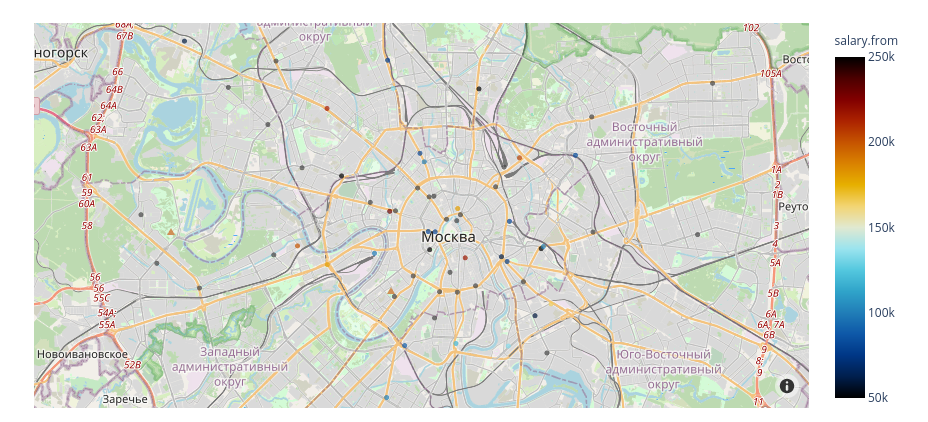

**Вывод:** Распределение заработтной платы, как и распределение количества вакансий в регионах Москвы неравномерные. Можно заметить, что в удаленных районах Москвы меньше средняя заработная плата и северо-восточная часть Москвы содержит меньшее количество вакансий.

Какие выводы можно сделать из построенных графиков?

Для успешной работы необходимо уметь работать с базами данных и овладеть `Python`ом. При этом самые выгодные и востребованные должности: аналитики, data science, data analyst. Многие вакансии не содержат подробной информации о заработной плате, но по полученным данным выгодно работать около станций метро Аэропорт и Новокузнецкая (заработная плата высокая и много вакансий).

**3. Анализ профессии, о которой вы мечтали в детстве**

Проведите аналогичное исследование для профессии, о которой вы мечтали в детстве. Это может быть повар, учитель, пожарный и т.д. &mdash; все зависит от вас ☺.

In [55]:
с

NameError: name 'с' is not defined

**Замечание в тему.** Многие из вас наверняка сейчас уже начинают задумываться о работе. Конечно, вы имеете на это полное право. Однако, по нашему опыту работа на 3 курсе отрицательно сказывается на степени усвоения материала. По сути все предметы цикла Data Science у вас еще впереди. Подумайте, наверное, лучше разобраться во всем во время учебы, чем потом что-то где-то нагонять. Более простой вариант &mdash; летняя стажировка, но не забудьте отдохнуть, набравшись сил перед непростым 3 курсом ☺.

---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 4.

Найдите оценку параметра $\theta$ методом моментов по выборке размера $n$ из распределения:
* $U(a, b), \theta=(a, b)$; 

Пусть есть выборка размера $n$ из равномерного распределения с параметрами $(a,b)$. Из метода моментов:
\begin{cases}
E_{\theta} X_1 = \overline{X}, \\
E_{\theta} X_1^2 = \overline{X^2}.
\end{cases}

\begin{cases}
\frac{a+b}{2} = \overline{X}, \\
\frac{a^2 + ab + b^2}{3} = \overline{X^2}.
\end{cases}


Из первого уравнения $$a = 2 \overline{X} - b.$$

Подставим во второе:
$$4 \overline{X}^2 - 4 \overline{X} b + b^2 + 2 \overline{X} b -b^2 + b^2 = 3 \overline{X^2}.$$

Получаем квадратное уравнение:
$$b^2 -  2 \overline{X} b + 4 \overline{X}^2 - 3 \overline{X^2} = 0,\, D = 4 \overline{X}^2 - 16 \overline{X}^2 + 12 \overline{X^2} = 12 S^2.$$

В данном выражение используется $S^2 = \overline{X^2}-\overline{X}^2$ &mdash; выборочная смещенная дисперсия.

Получаем корни (значения $b$), учтем, что $a<b$ и получим решение системы:

\begin{cases}
a = \overline{X} - \sqrt{3 S^2}, \\
b = \overline{X} + \sqrt{3 S^2}.
\end{cases}

* $Pois(\theta)$;

Аналогично получаем:

$$E_{\theta} X_1 = \overline{X}.$$

Зная, что $E_{\theta} X_1 = \theta$, получаем

$$\theta = \overline{X}.$$



* $\mathcal{N}(a, \sigma^2), \theta=(a, \sigma)$.

Пусть есть выборка размера $n$ из нормального распределения с параметрами $(a, \sigma^2)$. Из метода моментов:
\begin{cases}
E_{\theta} X_1 = \overline{X}, \\
E_{\theta} X_1^2 = \overline{X^2}.
\end{cases}

Учитывая, что $D = EX^2 - \left(EX\right)^2 = EX^2 - a^2 = \sigma^2$, получим новую систему:

\begin{cases}
a = \overline{X}, \\
\sigma^2 + a^2 = \overline{X^2}.
\end{cases}

Откуда:
\begin{cases}
a = \overline{X}, \\
\sigma^2 = \overline{X^2} - \overline{X}^2.
\end{cases}

---
### Задача 5.

В данной задаче вам предстоит распарсить сайт, который вы выберите.

**1.** Каждая ссылка (URL) в интернете состоит из нескольких компонент:

* схема, *например, `http` или `https`*,
* хост, *наример, `en.wikipedia.org`*
* путь, по которому находится информация,
* параметры,
* якорь &mdash; указание фрагмента страницы.

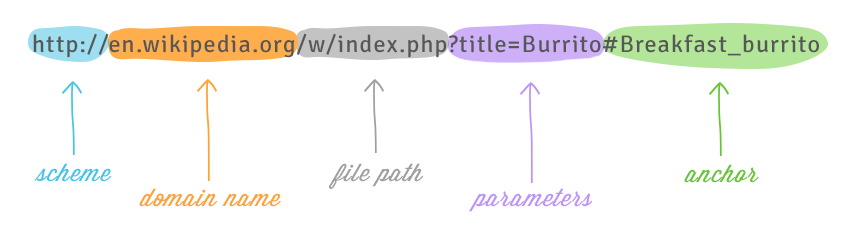

Одна и та же ссылка может иметь несколько форм и вести на ту же самую страницу. Во время обхода сайта это надо учитывать и сохранять один уникальный урл для каждой страницы. Процедура, приводящая урл к каноничному виду, называется нормализацией.
Процедуры, которые применяются к урлу для нормализации, описаны, например, на <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_URL">Википедии</a>.

Установите пакет `url_normalize`, в котором есть готовая функция для нормализации.

Прочитайте, как именно функция `url_normalize` меняет ссылку, и приведите примеры $4$ урлов, которые нормализуются к одному и тому же. Примеры должны демонстрировать различные этапы процедуры нормализации. Одним из этих примеров может быть сам нормализованный урл.

In [345]:
import url_normalize.url_normalize as urlnorm

_____________
Изучите код, в котором скачиваются страницы сайта `simple.wikipedia.org` с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятия про парсинг данных</a>. Код, реализующий обход в ширину с фильтрацией и нормализацией урлов, приведён в виде функции.

In [ ]:
from urllib.parse import urlparse, urldefrag, urljoin
from urllib.request import urlopen
from bs4 import BeautifulSoup
from queue import Queue
import time

Код обхода в ширину:

In [ ]:
def load_web_pages(seed, max_downloads, filtration_function):
    '''Обходит web-страницы в ширину и загружает информацию о них.
    
    Принимает:
        seed (str) -- страница, с которой начинать обход.
        max_downloads (int) -- максимальное число загруженных страниц.
        filtration_function (str -> bool) -- функция, указывающая, 
            стоит ли загружать страницу. Пример: is_wiki_article.
            
    Возвращает:
        pages_json (list) - список словарей с информацией о страницах.
    '''
    
    # Создаём список со страницами
    pages_json = []
    
    # Создаём очередь для обхода в ширину
    q = Queue()
    q.put(seed)

    already_visited = set()
    n_downloads = 0
    time_start = time.time()

    while not q.empty():
        # Нормализуем урл
        main_url = url_normalize(q.get())
        if main_url in already_visited:
            continue
        already_visited.add(main_url)
        html = download_from_the_internet(main_url)

        # Извлекаем ссылки из страницы
        children_links = extract_links_from_html(main_url, html)
        time.sleep(1)

        # Извлекаем текст страницы
        text_info = extract_text_info_from_html(html) 

        # Добавляем запись в таблицу
        text_info['url'] = main_url
        pages_json.append(text_info)

        n_downloads += 1
        if n_downloads > max_downloads:
            break

        # Добавляем ещё не посещённые ссылки в очередь
        for child in children_links:
            if url_normalize(child) not in already_visited \
            and filtration_function(child):
                q.put(child)
                
    return pages_json

**2.** Выберите сайт, который вам интересен, а также некоторую категорию страниц в нём. Поймите, с какой страницы сайта надо начать обход, чтобы обходить сайты данной категории.

*Пример: ищем статьи про Data Science на Википедии, начинаем со статьи Data Dcience*.

**Укажите, что выбрали:** <...>

Придумайте критерий, который по тексту из HTML-страницы будет определять, находится ли страница в определённой вами категории.

*Пример: статья на Википедии про Data Science, если в ней есть слово "data" или термины из статистики, теории вероятностей и анализа данных*.

**Опишите критерий:** <...>

Начав с выбранной страницы, скачайте не менее $500$ страниц сайта. В качестве функции фильтрации возьмите функцию, которая отделяет страницы с выбранного сайта от других.

In [ ]:
...

Cделайте таблицу со следующей информацией:

* количество слов в тексте статьи;
* принадлежит ли страница выбранной категории.

Для последнего пункта можете воспользоваться функцией поиска слов по заданным префиксам, рассмотренной на <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятии</a>.

In [ ]:
...

Определите, какой процент скачанных страниц принадлежит выбранной категории?

In [ ]:
...

C помощью гистограмм сравните визуально распределения количества слов в статьях из выбранной категории и во всех остальных. Для этих двух распределений вычислите средние, медианы и дисперсии. Средние и медианы отобразите на графиках с гистограммами. Сделайте выводы.

In [ ]:
...

Постройте boxplot-графики для того, чтобы сравнить эти 2 распределения. Какой способ сравнения кажется вам более удобным?

In [ ]:
...

**3.** При помощи `plotly` визуализируйте скачанные страницы сайта. В качестве значений по осям возьмите количество слов на странице и количество ссылок на ней. Цветом обозначьте принадлежность выбранной вами категории. При наведении курсора на точку, обозначающую страницу, должна появляться подсказка с названием этой страницы.

In [ ]:
...

**4.** Предложите функцию фильтрации web-страниц, которую нужно подать в `load_web_pages`, чтобы среди скачанных сайтов был больше процент страниц из выбранной вами категории.

In [ ]:
...

Скачайте снова не менее $500$ страниц, но уже с новой функцией фильтрации. Добавьте следующую информацию к каждой странице:

* глубина в обходе,
* время скачивания страницы.

Для замера времени можете воспользоваться функцией `time` из пакета `time`.

In [ ]:
...

Постройте гистограмму и ядерную оценку плотности для времени скачивания страницы.

In [ ]:
...

Какими известными вам стандартными распределениями оно может быть приближено? Найдите оценку параметров этого распределения по методу моментов и отобразите на графике плотность с полученными значениями параметров.

*Замечание.* Результат сильно зависит от сайта, железа и прочих характеристик. По идее должно получится неплохое приближение чем-то из того, что вам известно. Но если ничего не получится, то просто оставьте и прокомментируйте ваши попытки разобраться.

In [ ]:
...

**Выводы:** <...>